### LSE Data Analytics Online Career Accelerator 

# Course 3 Assignment:  Advanced Analytics for Organisational Impact

## Introduction: Turtle Games

This Analysis works to address Turtle Game's business objective of how to improve overall sales performance by utilising customer trends. This will be done using Python and R with relevant libraries to gain insights into Turtle Games customers and leverage their Sales & Marketing Data to meet their business objectives. Here we will explore the datasets provided by the stakeholders (Turtle Games) shown below, create visualisations to identify trends and extract meaningful insights to inform strategic decisions. 

1. __Reviews - turtle_reviews.csv:__ Details of customer demographics and product reviews: 
> - Gender, age, remuneration, spending score, loyalty points, education, language, platform, review and summary across products.

2. __Sales - turtle_sales.csv:__ Details of video games sold globally:
> - Rank, product, platform, genre, publisher, and their sales across North America, Europe, and worldwide.


### The working order of how this project in Python is:

1. Setting Up the GitHub Repository & Importing and Exploring Data. Apply linear regression techniques to determine how customers accumulate loyalty points
2. Make predictions with clustering. apply k-means clustering to determine how useful remuneration and spending scores are in providing data for analysis.
3. Analyse customer sentiments with reviews using natural language processing (NLP) to determine how social data (e.g. customer reviews) can be used to inform marketing campaigns.

Throughout this report, there are also personal notes of theoretical content included for personal review to help with the understanding of more advanced statistical concepts.

# 1: Linear regression using Python

## Setting Up the GitHub Repository

### My GitHub repository:
    
[Click Here](https://github.com/The-Ryan-Lin/Ryan_Lin_DA301_Assignment.git)

## 1. Importing and Exploring Data

### Prepare your workstation

In [1]:
# Import necessary libraries.

import numpy as np
import pandas as pd
import pylab as py
import sklearn
import math

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy import special

import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan

from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [2]:
# Load the CSV file(s) as reviews.
reviews_df = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews_df

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# Determine Missing Values
reviews_df.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Handle missing values
reviews_df.dropna()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [5]:
# Explore the data.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
reviews_df.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [7]:
# Check for duplicates in the DataFrame. An empty DataFrame result means there are no duplicates
duplicates = reviews_df.duplicated()

# Print the rows that are duplicates (if any).
print(reviews_df[duplicates])

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []


## 2. Drop columns

In [8]:
# Drop unnecessary columns.
reviews_df.drop(columns=['language', 'platform'], inplace=True)

# View column names.
reviews_df

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 3. Rename columns

In [9]:
# Rename the column headers. # remuneration is in £k
reviews_df.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
reviews_df.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews_df.to_csv('reviews.csv', index=False)

In [11]:
# Import new CSV file with Pandas.
reviews_cleaned_df = pd.read_csv('reviews.csv')

# View DataFrame.
display(reviews_cleaned_df)

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [12]:
# Sense check data with shape and info
print(reviews_cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [13]:
# Create new dataframe with the variables in question
reviews_filtered_df = pd.DataFrame(reviews_cleaned_df, columns=['age', 'remuneration', 'spending_score', 'loyalty_points'])

# View any correlations between the variables in question
reviews_filtered_df.corr()

age  remuneration  spending_score  loyalty_points
age             1.000000     -0.005708       -0.224334       -0.042445
remuneration   -0.005708      1.000000        0.005612        0.616065
spending_score -0.224334      0.005612        1.000000        0.672310
loyalty_points -0.042445      0.616065        0.672310        1.000000

__The correlation coefficients indicate:__

__Age and Remuneration (-0.0057.):__ Very weak, almost negligible negative correlation. This might imply that age has little influence on how much a person is paid in this context.

__Remuneration and Spending Score (0.0056):__ Very weak positive correlation. Earning more doesn't necessarily mean a higher spending score, or vice versa.

__Spending Score and Loyalty Points (-0.042445)__: Very weak, almost negligible negative correlation. Implies that age has little influence on loyalty points. 

__Spending Score and Loyalty Points (0.6723):__ Moderately strong positive correlation. This could mean that customers who have higher spending scores tend to have more loyalty points, which could indicate that they are more loyal or frequent customers.

__Remuneration and Loyalty Points (0.6161):__ Moderately strong positive correlation. This suggests that individuals with higher remuneration (salary) tend to have more loyalty points, implying that higher-paid individuals may be more loyal customers.

It's important to remember that correlation does not imply causation. The strength and direction of the correlation can vary in different contexts, and other factors not considered in this analysis might also influence these relationships. 

## Visualise the Data

In [14]:
# DataFrame changed to df for ease of coding below
df = reviews_cleaned_df

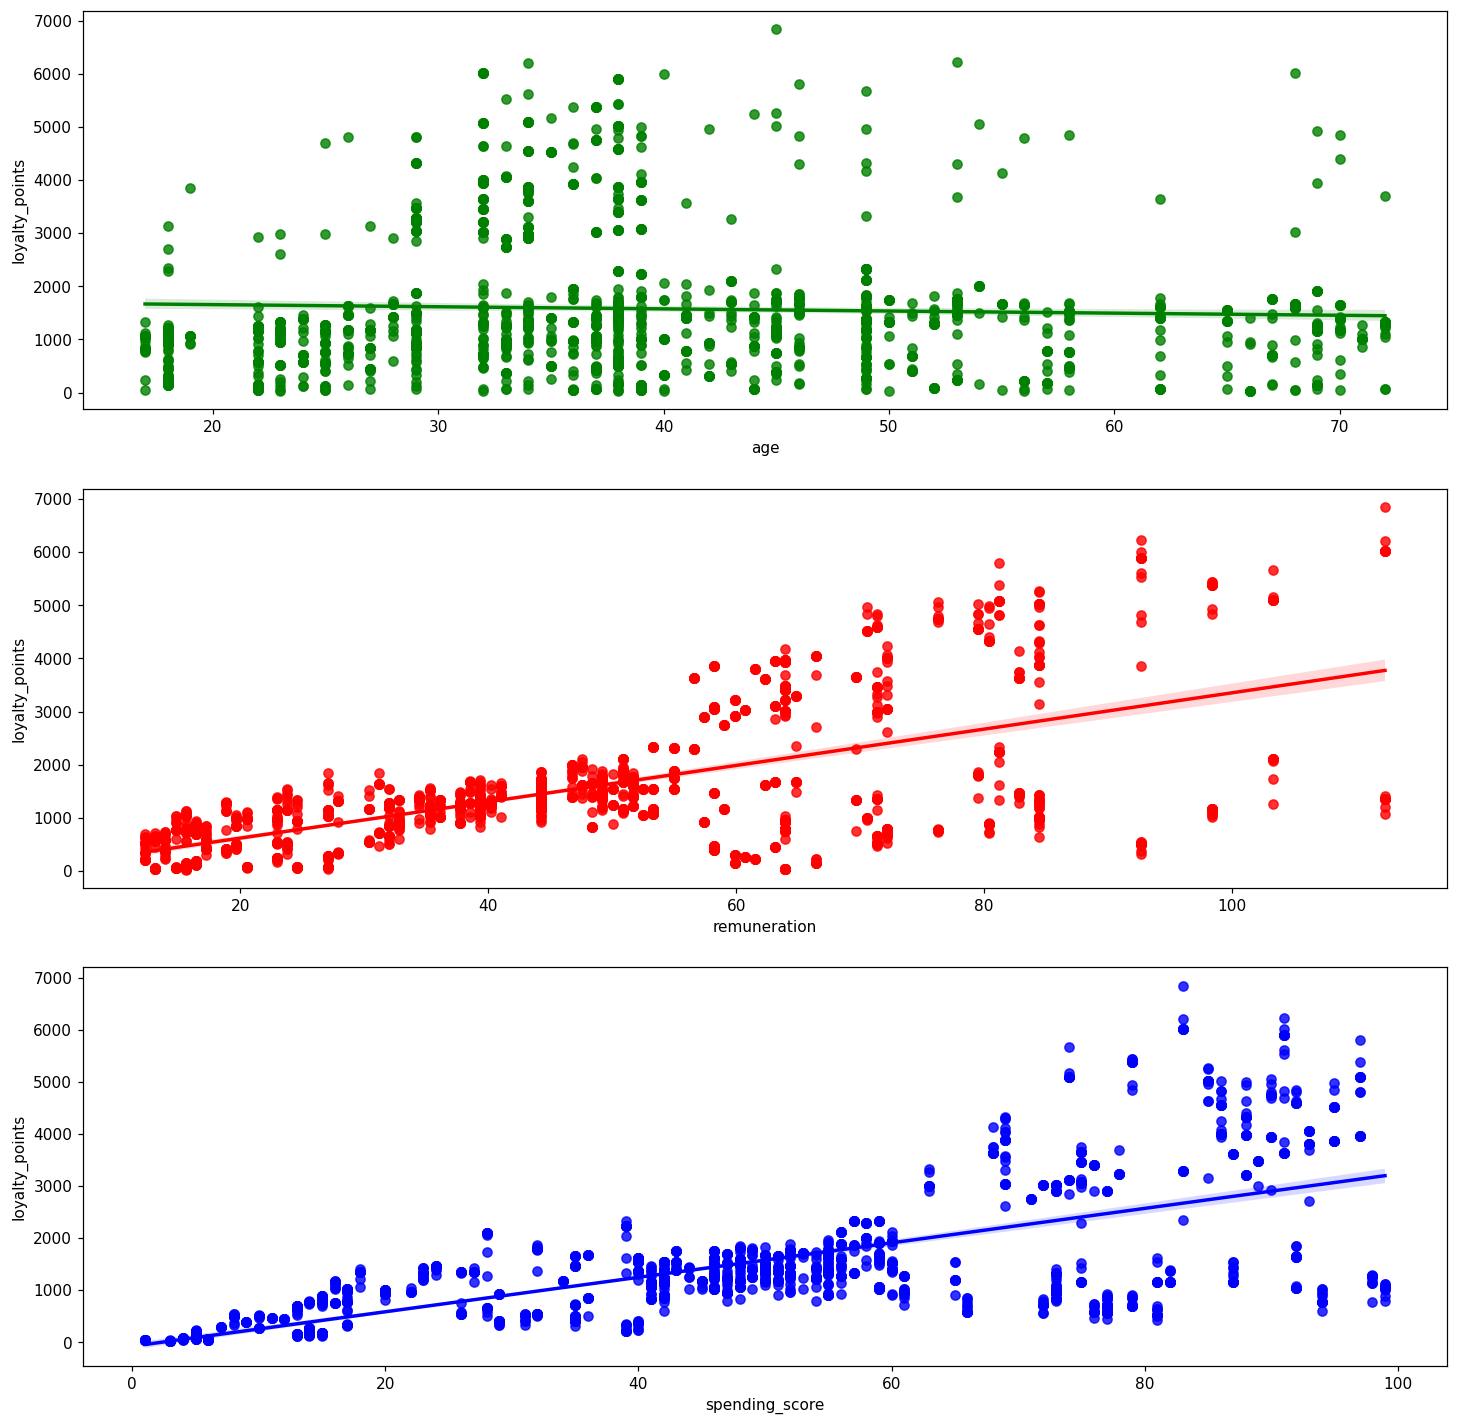

In [15]:
# Set the figure size and DPI
plt.figure(figsize=(16, 16), dpi=110)

# Scatterplot for age vs. loyalty points
plt.subplot(3, 1, 1)
plt.ylabel("loyalty points")
plt.xlabel("age")
sns.regplot(data=df, y='loyalty_points', x='age', color='green')

# Scatterplot for remuneration vs. loyalty points
plt.subplot(3, 1, 2)
plt.ylabel("loyalty points")
plt.xlabel("remuneration")
sns.regplot(data=df, y='loyalty_points', x='remuneration', color='red')

# Scatterplot for spending score vs. loyalty points
plt.subplot(3, 1, 3)
plt.ylabel("loyalty points")
plt.xlabel("spending_score")
sns.regplot(data=df, y='loyalty_points', x='spending_score', color='blue')

# Save the figure as a PNG file
plt.savefig("loyalty_points_vs_variables.png", bbox_inches="tight")

plt.show()

### Loyalty Points

Before conducting the multiple linear regression model using OLS, the distribution of the dependent variable "loyalty_points" was analysed through histograms and Q-Q plots to understand the underlying data characteristics. This is to ensure whether the assumptions of linear regression, such as normality, are met. It's important to note that it's primarily relevant for the dependent variable and not necessarily the independent variables (age, remuneration, spending scores).

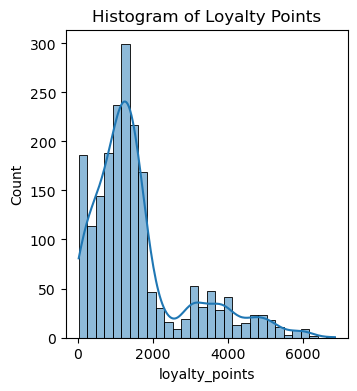

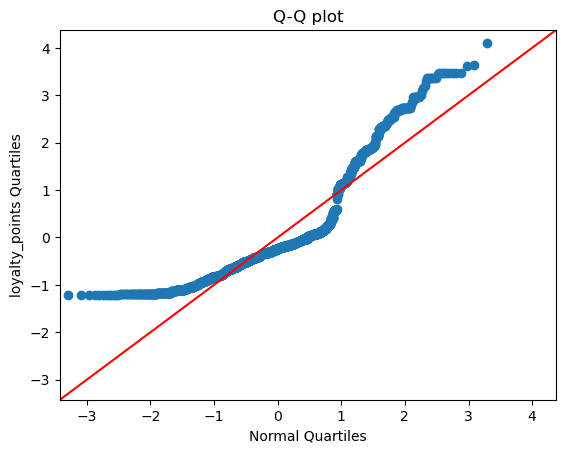

ShapiroResult(statistic=0.8430723547935486, pvalue=1.243021802779329e-40)


In [16]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='loyalty_points', bins=30, kde=True)
plt.title("Histogram of Loyalty Points")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['loyalty_points'], fit=True, line='45')
plt.ylabel("loyalty_points Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['loyalty_points']))

The histogram of loyalty points is heavily skewed and asymmetric, indicating that it does not follow the normal distribution.

The QQ plot, used to compare the distribution of "loyalty_points" to a theoretical normal distribution, shows the data points do not fall approximately along the 45° line, Indicating I'm not normal distribution. 

The p-value from the Shapiro_Wilk test is below the significance level of 0.05 suggesting that the data significantly deviates from a normal distribution.

As loyalty points significantly deviate from normal distribution we need to consider data transformations or alternative regression techniques that are more robust to deviations from normality.

### Log-transformed loyalty points

In [17]:
# Log-transform loyalty points
df['log_loyalty_points'] = np.log(df['loyalty_points'])

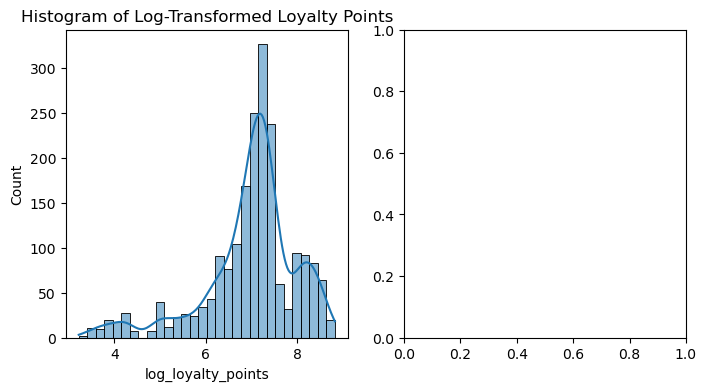

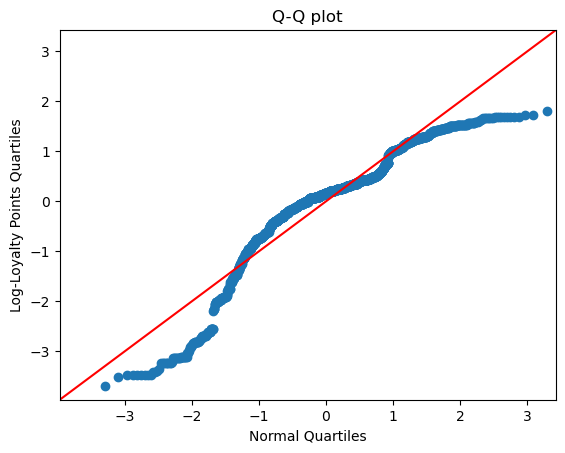

Shapiro-Wilk Test:
Test Statistic: 0.9045404195785522
p-value: 1.2328422202595952e-33


In [18]:
# Draw histogram of the log-transformed 'loyalty_points'
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1, 2, 1)
sns.histplot(df, x='log_loyalty_points', bins=30, kde=True)
plt.title("Histogram of Log-Transformed Loyalty Points")

# Plot the log-transformed 'loyalty_points' versus the quartiles of the N(0,1)
plt.subplot(1, 2, 2)
sm.qqplot(df['log_loyalty_points'], fit=True, line='45')
plt.ylabel("Log-Loyalty Points Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

# Perform the Shapiro-Wilk test on the log-transformed 'loyalty_points'
shapiro_result = shapiro(df['log_loyalty_points'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_result.statistic)
print("p-value:", shapiro_result.pvalue)

__Test Statistic (W statistic):__

The test statistic, denoted as 'W,' quantifies the deviation of the data from a normal distribution.
If the data closely follows a normal distribution, the W statistic will be close to 1. The closer it is to 1, the more the data resembles a normal distribution.

__p-value:__

The p-value associated with the test statistic indicates the probability of obtaining a W statistic as extreme as the one calculated from the data, assuming the null hypothesis is true.

The null hypothesis (H0) of the Shapiro-Wilk test is that the data follows a normal distribution.

The p-value helps determine whether you should reject the null hypothesis or not.
If the p-value is small (typically less than your chosen significance level, e.g., 0.05), you may reject the null hypothesis, indicating that your data significantly deviates from a normal distribution.

If the p-value is large (greater than your chosen significance level), you fail to reject the null hypothesis, suggesting that your data does not significantly deviate from a normal distribution.

__The log-transformed__ "loyalty_points" variable exhibits a much closer-to-normal distribution than the original "loyalty_points" variable, as indicated by the histogram and Q-Q plot. 

__Histogram and Q-Q Plot:__ The histogram of the log-transformed variable appears more symmetric and bell-shaped, which is closer to a normal distribution. The Q-Q plot also shows data points aligning more closely to the 45-degree line, further indicating a better fit to a normal distribution.

__Shapiro-Wilk Test:__ The Shapiro-Wilk test is a formal statistical test of normality. A small p-value suggests a significant departure from normality. In this case, the p-value is very close to zero (p-value ≈ 1.23e-33), which indicates a significant departure from normality for the log-transformed "loyalty_points." However, this test can be sensitive to large sample sizes, and minor deviations from normality may produce low p-values even if the distribution is nearly normal.


### Box-Cox Transformation of loyalty points

In [19]:
# Step 1: Apply the Box-Cox transformation
df['loyalty_points_boxcox'], lambda_bestfit = stats.boxcox(df['loyalty_points'])

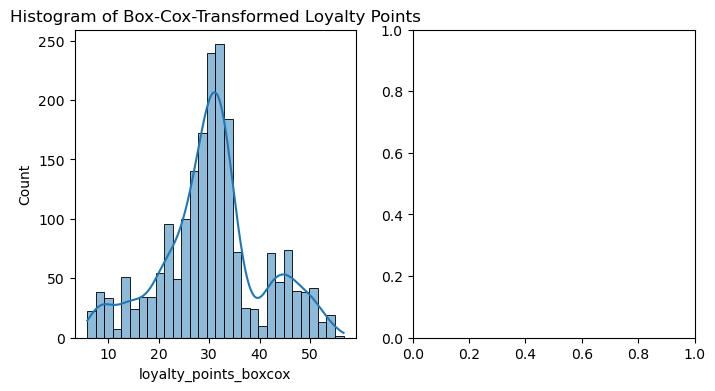

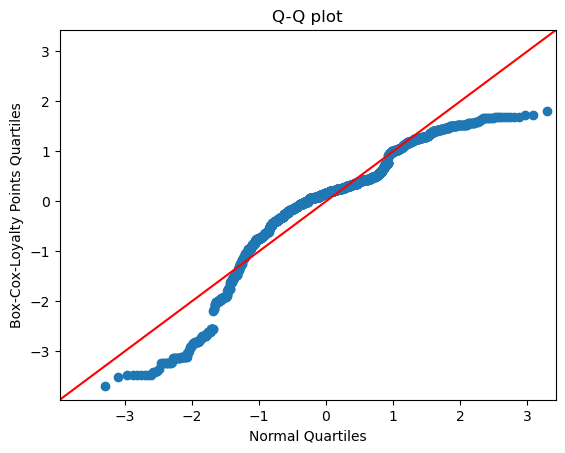

Shapiro-Wilk Test:
Test Statistic: 0.9719003438949585
p-value: 2.346039830553123e-19


In [20]:
# Draw histogram of the Box-Cox-transformed 'loyalty_points'
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1, 2, 1)
sns.histplot(df, x='loyalty_points_boxcox', bins=30, kde=True)
plt.title("Histogram of Box-Cox-Transformed Loyalty Points")

# Plot the Box-Cox-transformed 'loyalty_points' versus the quartiles of the N(0,1)
plt.subplot(1, 2, 2)
sm.qqplot(df['log_loyalty_points'], fit=True, line='45')
plt.ylabel("Box-Cox-Loyalty Points Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

# Perform the Shapiro-Wilk test on the Box-Cox-transformed 'loyalty_points'
shapiro_result = shapiro(df['loyalty_points_boxcox'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_result.statistic)
print("p-value:", shapiro_result.pvalue)

### Age

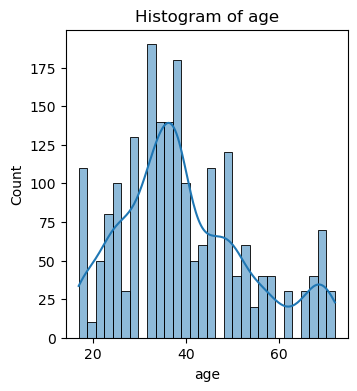

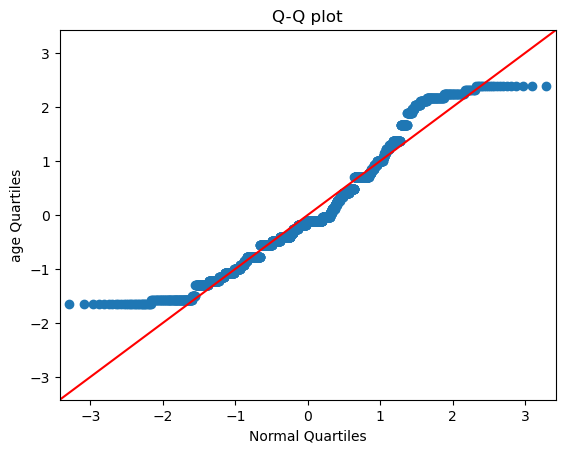

ShapiroResult(statistic=0.9524177312850952, pvalue=5.384232057927602e-25)


In [21]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='age', bins=30, kde=True)
plt.title("Histogram of age")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['age'], fit=True, line='45')
plt.ylabel("age Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['age']))

### Remuneration (Total Income per Year)

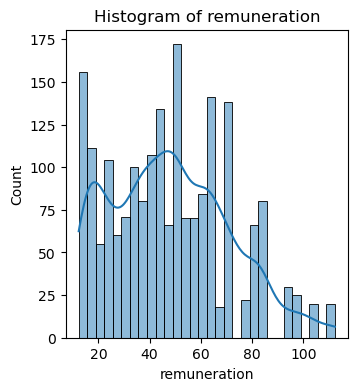

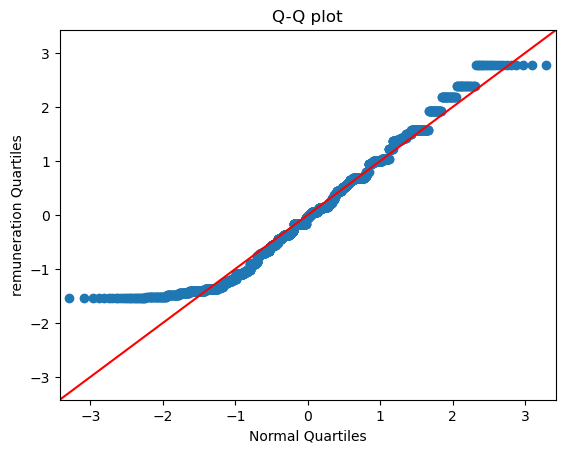

ShapiroResult(statistic=0.9676777124404907, pvalue=8.844986552273406e-21)


In [22]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='remuneration', bins=30, kde=True)
plt.title("Histogram of remuneration")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['remuneration'], fit=True, line='45')
plt.ylabel("remuneration Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['remuneration']))

### Spending Score

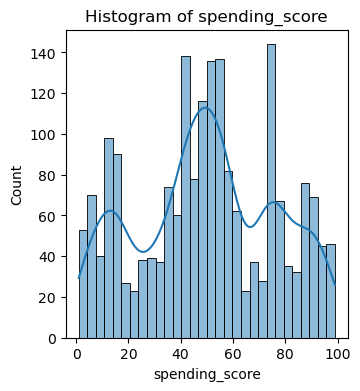

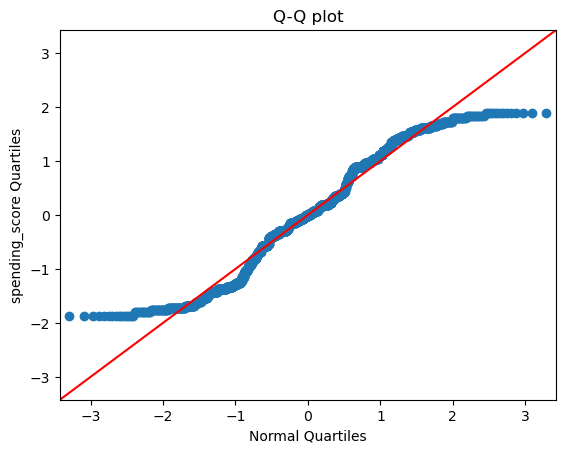

ShapiroResult(statistic=0.9683461785316467, pvalue=1.454314864102208e-20)


In [23]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='spending_score', bins=30, kde=True)
plt.title("Histogram of spending_score")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['spending_score'], fit=True, line='45')
plt.ylabel("spending_score Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['spending_score']))

## 5. Multiple Linear regression

### Check for linearity, independence of errors, and homoscedasticity before dcising on a multiple linear regression model using OLS

### Using Orignal Loyaloty Points Data 

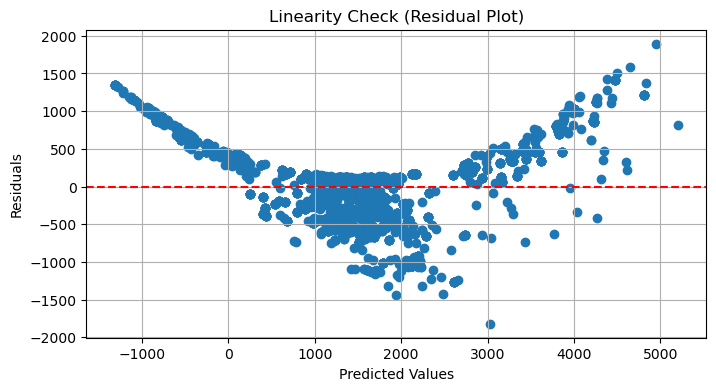

In [24]:
# Step 1: Fit the multiple linear regression model
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['loyalty_points']  # Dependent variable
model = sm.OLS(y, X).fit()

# Step 2: Linearity
# Check linearity by plotting the observed values against the predicted values (residual plot)
predicted = model.predict(X)
residuals = y - predicted
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residual Plot)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [25]:
# Step 3: Independence of Errors
# Check independence of errors using a Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)
# If the statistic is around 2 (close to 2), it suggests independence of errors.

Durbin-Watson Statistic: 3.4534017787867324


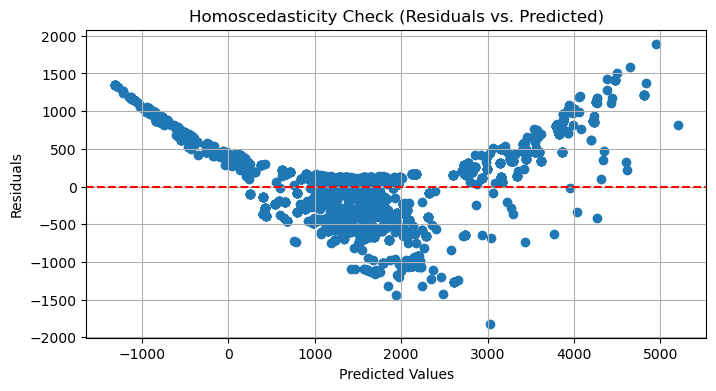

In [26]:
# Step 4: Homoscedasticity
# Check for homoscedasticity using a scatterplot of residuals against the predicted values
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Residuals vs. Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [27]:
# Step 5: Additional Diagnostics
# You can also calculate VIF (Variance Inflation Factor) to check for multicollinearity.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

# Step 6: Run the multiple linear regression model using OLS
results = model.summary()
print(results)

VIF:
         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014
                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:15:16   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|  

The basic diagnostic checks above indicate that the key assumption of linearity, independent of errors, and homoscedasticity have not been met using the original loyalty points data. See the log transformed explanantion below for more detail. 


### Using log-transformed Loyaloty Points Data 

In [28]:
# Step 1: Fit the multiple linear regression model
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['log_loyalty_points']  # Log-transformed dependent variable
model = sm.OLS(y, X).fit()

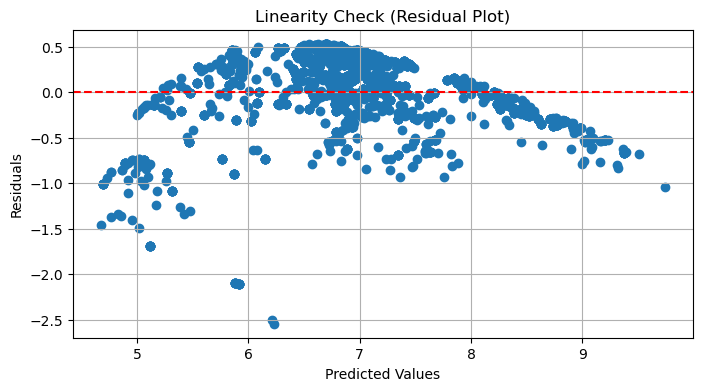

In [29]:
# Step 2: Linearity Check
predicted = model.predict(X)
residuals = y - predicted
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residual Plot)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [30]:
# Step 3: Independence of Errors
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.2195530464653463


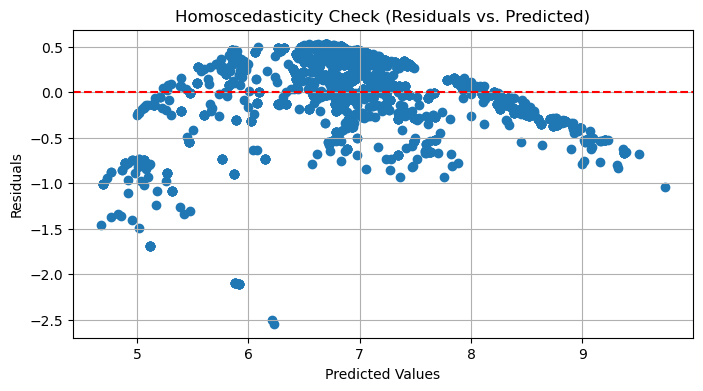

In [31]:
# Step 4: Homoscedasticity Check
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Residuals vs. Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [32]:
# Step 5: Additional Diagnostics (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)                                              

VIF:
         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014


In [33]:
# Step 6: Run the multiple linear regression model using OLS
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:15:17   Log-Likelihood:                -1182.5
No. Observations:                2000   AIC:                             2373.
Df Residuals:                    1996   BIC:                             2395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9913      0.045     89.

- __Linearity Check:__ The residual plot exhibits a dome-shaped or curved pattern, which indicates a potential violation of the linearity assumption. A non-linear relationship may exist between the independent variables and the log-transformed "loyalty_points."

- __Independence of Errors__: The Durbin-Watson statistic is approximately 1.22, indicating minimal autocorrelation in the residuals, which suggests that the independence of errors assumption is met.
Homoscedasticity Check:

- __Homoscedasticity Check:__ The Residuals vs. Predicted plot also exhibits a dome-shaped or curved pattern, indicating a potential violation of the homoscedasticity assumption. The spread of residuals appears to vary with the predicted values.

- __VIF (Variance Inflation Factor):__ The VIF values for "age," "remuneration," and "spending_score" are all close to 1, suggesting little multicollinearity among the independent variables. The VIF value for the intercept ("const") is relatively high but is not typically a concern.

__Model Summary:__

The R-squared value of 0.816 indicates that approximately 81.6% of the variability in the log-transformed "loyalty_points" is explained by the independent variables.
The F-statistic is significant (Prob (F-statistic) ≈ 0.00), suggesting that the model as a whole is statistically significant.

The coefficients for the independent variables are statistically significant (P-values close to 0), suggesting that each independent variable makes a significant contribution to the model.

The Durbin-Watson statistic is close to 2, indicating minimal autocorrelation.

There is a potential violation of the linearity assumption, as evidenced by the dome-shaped residual plot.
The Durbin-Watson statistic suggests minimal autocorrelation in the residuals, which is a favorable result.
The homoscedasticity assumption may be violated, as the Residuals vs. Predicted plot also exhibits a dome-shaped pattern.
Multicollinearity among the independent variables is not a concern, as indicated by the low VIF values.

The model has good explanatory power (R-squared) and is statistically significant.
To address the issues with linearity and homoscedasticity. To better capture the relationship between the independent variables "loyalty_points" a Box-Cox transformation was applied and tested below.

### Using Box-Cox Transformation

In [34]:
# Step 1: Apply the Box-Cox transformation
df['loyalty_points_boxcox'], lambda_bestfit = stats.boxcox(df['loyalty_points'])

In [35]:
# Step 2: Fit the multiple linear regression model with the transformed data
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['loyalty_points_boxcox']  # Transformed dependent variable
model = sm.OLS(y, X).fit()

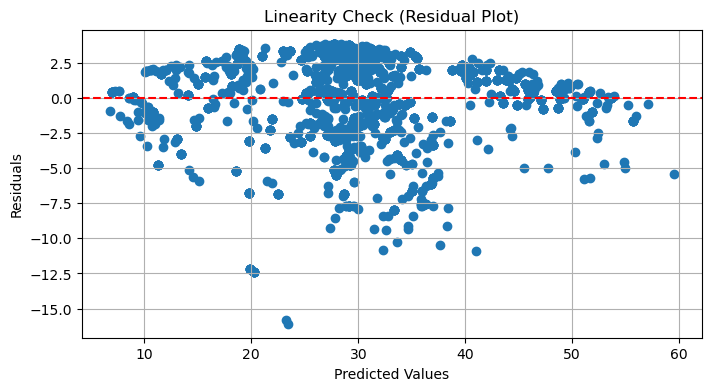

In [36]:
# Step 3: Linearity Check
predicted = model.predict(X)
residuals = y - predicted
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residual Plot)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [37]:
# Step 4: Independence of Errors
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.72888524268131


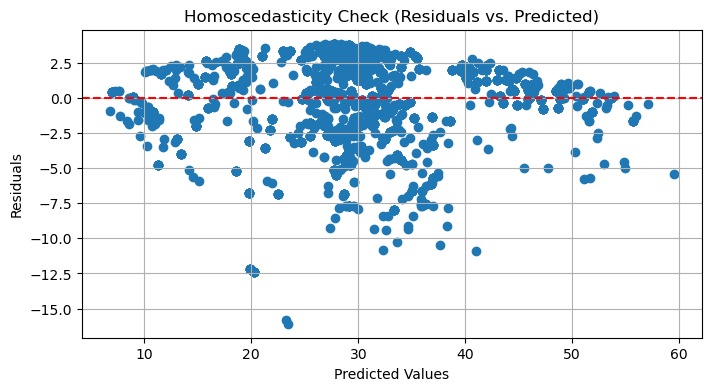

In [38]:
# Step 5: Homoscedasticity Check
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Residuals vs. Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [39]:
# Step 6: Additional Diagnostics (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

VIF:
         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014


In [40]:
# Step 7: Run the multiple linear regression model using OLS
results = model.summary()
print(results)

                              OLS Regression Results                             
Dep. Variable:     loyalty_points_boxcox   R-squared:                       0.903
Model:                               OLS   Adj. R-squared:                  0.903
Method:                    Least Squares   F-statistic:                     6194.
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                           08:15:17   Log-Likelihood:                -5108.1
No. Observations:                   2000   AIC:                         1.022e+04
Df Residuals:                       1996   BIC:                         1.025e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

__Linearity Check:__ The residual plot is only slightly dome-shaped, with data points clustered around the residual zero line. This suggests an improvement in meeting the linearity assumption compared to the original transformation, and the relationship between the transformed "loyalty_points" and independent variables is approximately linear.

__Durbin-Watson Statistic:__ The Durbin-Watson statistic is approximately 1.729, indicating minimal autocorrelation in the residuals. This is a favorable result, suggesting that the independence of errors assumption is met.

__Homoscedasticity Check:__ The Residuals vs. Predicted plot is also only slightly dome-shaped, with data points closer to the center zero residual line. While there's some improvement compared to the original transformation, there may still be minor variations in the spread of residuals across predicted values.

__VIF (Variance Inflation Factor):__

The VIF values for "age," "remuneration," and "spending_score" are all close to 1, suggesting little multicollinearity among the independent variables. The VIF value for the intercept ("const") is relatively high but is not typically a concern.

__Model Summary:__

The R-squared value is 0.903, indicating that approximately 90.3% of the variability in the Box-Cox transformed "loyalty_points" is explained by the independent variables.

The F-statistic is significant (Prob (F-statistic) ≈ 0.00), suggesting that the model as a whole is statistically significant.

The coefficients for the independent variables are statistically significant (P-values close to 0), indicating that each independent variable makes a significant contribution to the model.

The model with the Box-Cox transformed data shows significant improvements in meeting the linearity assumption compared to the original transformation. It still exhibits minor signs of dome-shaped residual plots, suggesting a relatively small degree of non-linearity. Additionally, the model satisfies the independence of errors assumption with a Durbin-Watson statistic close to 2.

The homoscedasticity assumption is also improved, although there may still be minor variations in the spread of residuals. The VIF values indicate no significant multicollinearity among the independent variables. The model has a high explanatory power (R-squared) and is statistically significant.



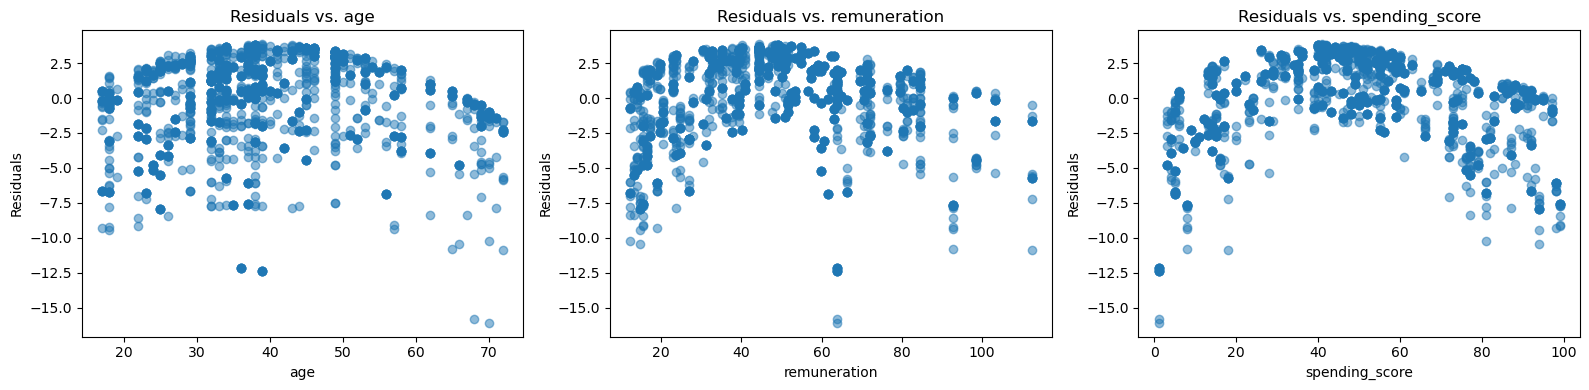

Breusch-Pagan Test for Heteroscedasticity:
P-Value: 2.6407106073657216e-05
F-Stat P-Value: 2.5147198151676235e-05


In [41]:
# Plot the residuals
residuals = model.resid

# Plot Residuals vs. Independent Variables
fig, axes = plt.subplots(1, len(model.params) - 1, figsize=(16, 4))
for i, predictor in enumerate(model.params.index[1:]):  # Exclude the intercept
    axes[i].scatter(df[predictor], residuals, alpha=0.5)
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {predictor}")

plt.tight_layout()
plt.show()

# Perform Breusch-Pagan Test for Heteroscedasticity
_, p_value, _, f_p_value = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test for Heteroscedasticity:")
print(f"P-Value: {p_value}")
print(f"F-Stat P-Value: {f_p_value}")

P-Value: The p-value associated with the Breusch-Pagan test is approximately 2.64e-05 (very close to zero). This low p-value suggests strong evidence against the null hypothesis that there is no heteroscedasticity in the model, the data provides significant support for the presence of heteroscedasticity.

F-Stat P-Value: The p-value associated with the F-statistic from the Breusch-Pagan test is also very low, approximately 2.51e-05. This is consistent with the low p-value mentioned earlier and reinforces the evidence of heteroscedasticity.

In summary, the results of the Breusch-Pagan test indicate that heteroscedasticity is present in the regression model. Heteroscedasticity means that the variance of the residuals is not constant across different values of the independent variables. This can have implications for the reliability and interpretability of the model's coefficients and statistical tests. Additional methods need to be considerede to address this (outside scope of this project), such as using robust standard errors or transforming the data to stabilize the variance of residuals.

## Simple Linear Regressions <br> 

Before conducting the multiple linear regression model, simple linear regression for each of the independant varaible against loyalty points was examined. 

### 5a) spending vs loyalty

In [42]:
# Independent variable.
x = df['spending_score']

# Dependent variable.
y = df['loyalty_points']

# OLS model and summary.
points1 = ols('y ~ x', data = df).fit()

# Print the regression table.
points1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        08:15:18   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

45% of the variation in loyalty points is explained by the independant variable spending. 
The p-value is 2.92e-263, thus less than 0.05 and is significant. 
If spending is changed by 1 unit, the layalty points will change by 33.06 units. The intercept is not significant, can be ignored.

In [43]:
# Extract the estimated parameters.
print("Parameters: ", points1.params)

# Extract the standard errors.
print("Standard errors: ", points1.bse)

# Extract the predicted values.
print("Predicted values: ", points1.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [44]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * df['spending_score']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

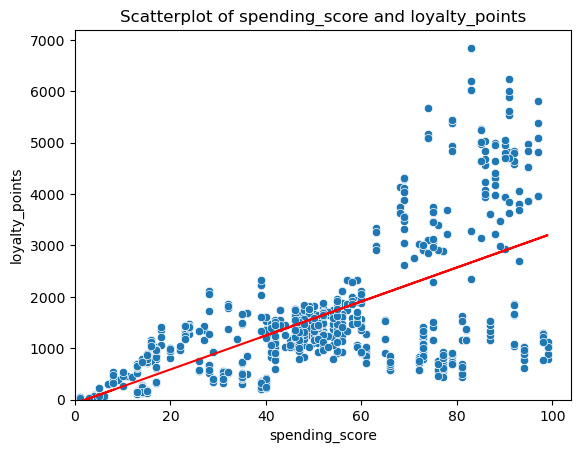

In [45]:
# Plot the graph with a regression line.
sns.scatterplot(data=df, x='spending_score', y='loyalty_points')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title("Scatterplot of spending_score and loyalty_points")
plt.show()

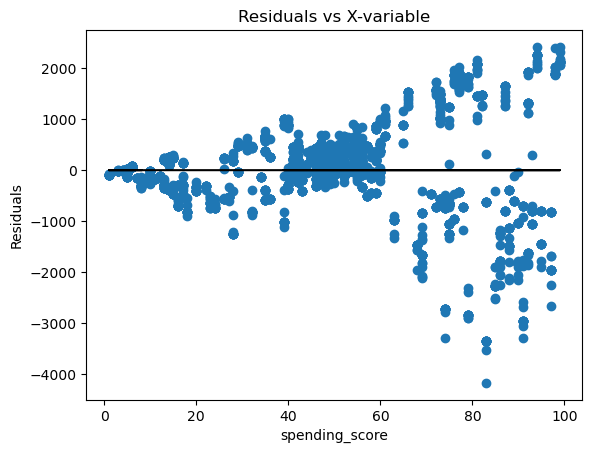

In [46]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x, points1.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("spending_score")
plt.ylabel("Residuals")
plt.show()

### 5b) remumeration vs loyalty

In [47]:
# Independent variable.
x = df['remuneration']

# Dependent variable.
y = df['loyalty_points']

# OLS model and summary.
points1 = ols('y ~ x', data = df).fit()

# Print the regression table.
points1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        08:15:18   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Extract the estimated parameters.
print("Parameters: ", points1.params)

# Extract the standard errors.
print("Standard errors: ", points1.bse)

# Extract the predicted values.
print("Predicted values: ", points1.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [49]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * df['remuneration']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

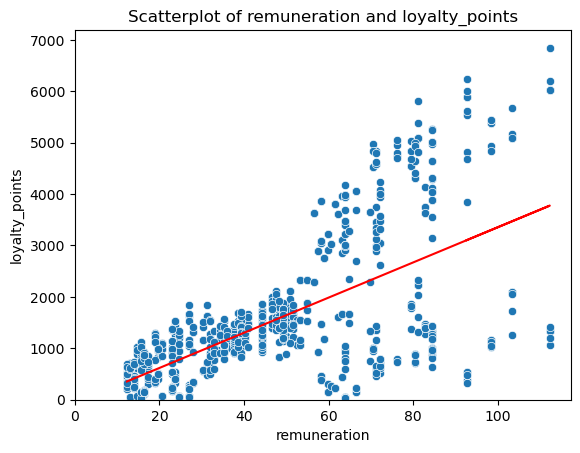

In [50]:
# Plot graph with regression line.
sns.scatterplot(data=df, x='remuneration', y='loyalty_points')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title("Scatterplot of remuneration and loyalty_points")
plt.show()

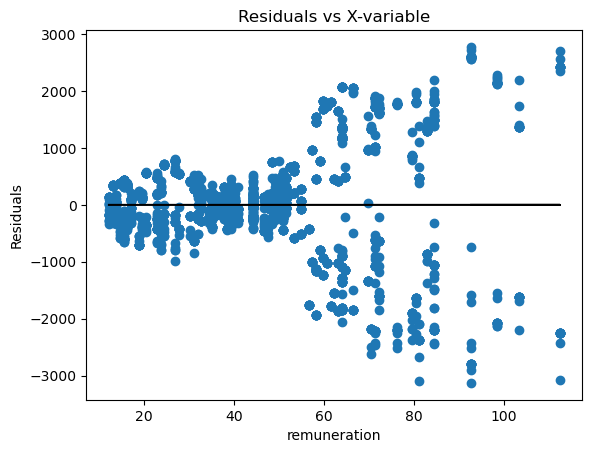

In [51]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x, points1.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("remuneration")
plt.ylabel("Residuals")
plt.show()

### 5c) age vs loyalty

In [52]:
# Independent variable.
x = df['age']

# Dependent variable.
y = df['loyalty_points']

# OLS model and summary.
points1 = ols('y ~ x', data = df).fit()

# Print the regression table.
points1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 20 Oct 2023   Prob (F-statistic):             0.0577
Time:                        08:15:19   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Extract the estimated parameters.
print("Parameters: ", points1.params)

# Extract the standard errors.
print("Standard errors: ", points1.bse)

# Extract the predicted values.
print("Predicted values: ", points1.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [54]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + -4.012805 * df['age']

# View the output.
y_pred


0       1664.287210
1       1644.223185
2       1648.235990
3       1636.197575
4       1604.095135
           ...     
1995    1588.043915
1996    1563.967085
1997    1600.082330
1998    1600.082330
1999    1608.107940
Name: age, Length: 2000, dtype: float64

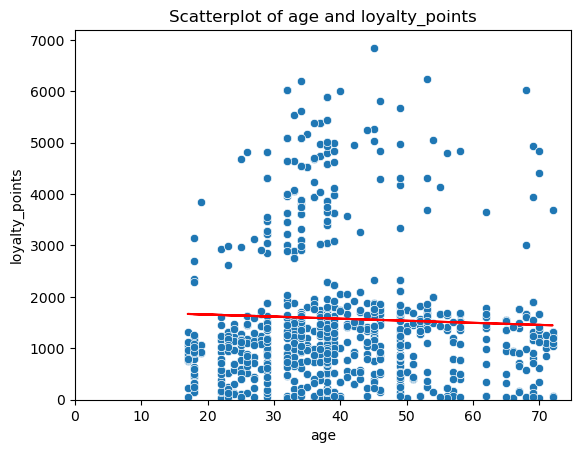

In [55]:
# Plot graph with regression line.
sns.scatterplot(data=df, x='age', y='loyalty_points')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title("Scatterplot of age and loyalty_points")
plt.show()

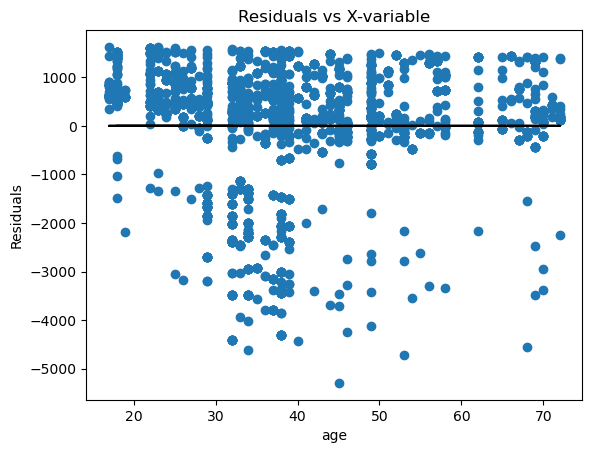

In [56]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x, points1.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("age")
plt.ylabel("Residuals")
plt.show()

## 6. Fitting the Multiple Linear Regression

In [57]:
# 1. Define the dependent variable.
y = df['loyalty_points'] 

# Define the independent variable, which now has two or three elements.
X = df[['age','remuneration', 'spending_score']]         # model with 3 explanatory variables
# X = df[['remuneration', 'spending_score']]               # model with 2 explanatory variables 

In [58]:
# 2. Create the OLS model.
X = sm.add_constant(X)  # Add a constant (intercept) term to the model
model = sm.OLS(y, X).fit()  # Fit the OLS model

In [59]:
# 3. Extract the estimated parameters, standard errors, and predicted values.
predictions = model.predict(X)  # Predicted values

In [60]:
# 4. Generate the regression table with coefficient and constant values.
regression_table = model.summary()

# Display the regression summary.
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:15:19   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.0598     52.361    -42.

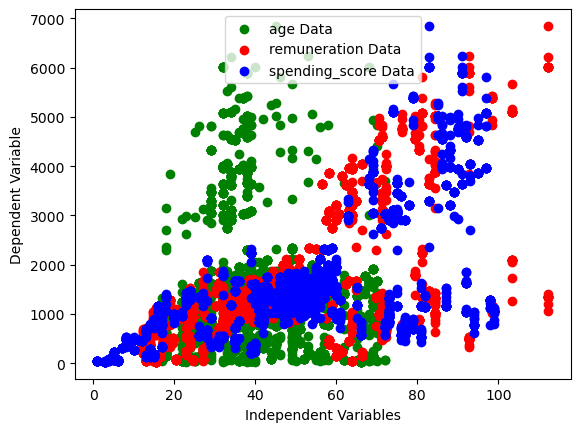

In [61]:
# 5. Plot the linear regression and add a regression line.
# Create a scatterplot of the data points.

# Plot the data points.
plt.scatter(X['age'], y, color='green', label='age Data')
plt.scatter(X['remuneration'], y, color='red', label='remuneration Data')
plt.scatter(X['spending_score'], y, color='blue', label='spending_score Data')

# Set labels and legend.
plt.xlabel('Independent Variables')
plt.ylabel('Dependent Variable')
plt.legend()

# Show the plot.
plt.show()

### Fit a Multiple Linear Regression with Box-Cox transformed loyalty_points

In [62]:
# 1. Specify the independent and dependent variables.
y = df['loyalty_points_boxcox']  # Dependent variable (target)
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables (features)

In [63]:
# 2. Create the OLS model.
X = sm.add_constant(X)  # Add a constant (intercept) term to the model
model = sm.OLS(y, X).fit()  # Fit the OLS model

In [64]:
# 3. Extract the estimated parameters, standard errors, and predicted values.
predictions = model.predict(X)  # Predicted values

In [65]:
# 4. Generate the regression table with coefficient and constant values.
regression_table = model.summary()

# Display the regression summary.
print(regression_table)

                              OLS Regression Results                             
Dep. Variable:     loyalty_points_boxcox   R-squared:                       0.903
Model:                               OLS   Adj. R-squared:                  0.903
Method:                    Least Squares   F-statistic:                     6194.
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                           08:15:20   Log-Likelihood:                -5108.1
No. Observations:                   2000   AIC:                         1.022e+04
Df Residuals:                       1996   BIC:                         1.025e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

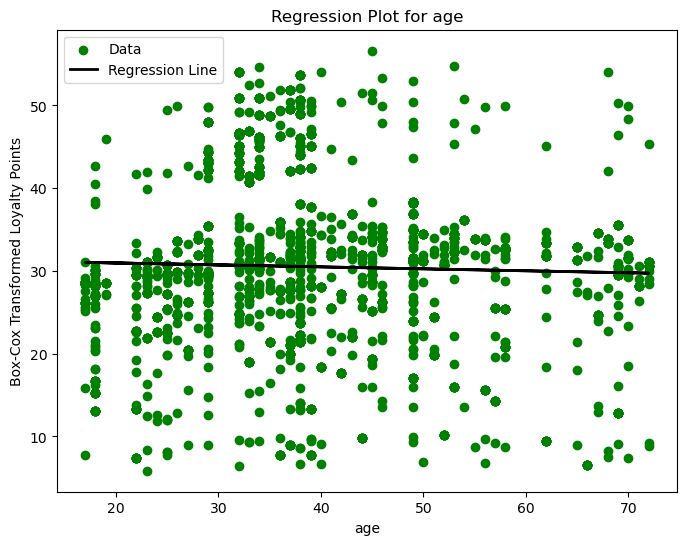

Regression Summary for age:
                              OLS Regression Results                             
Dep. Variable:     loyalty_points_boxcox   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     2.069
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):              0.150
Time:                           08:15:20   Log-Likelihood:                -7440.2
No. Observations:                   2000   AIC:                         1.488e+04
Df Residuals:                       1998   BIC:                         1.490e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

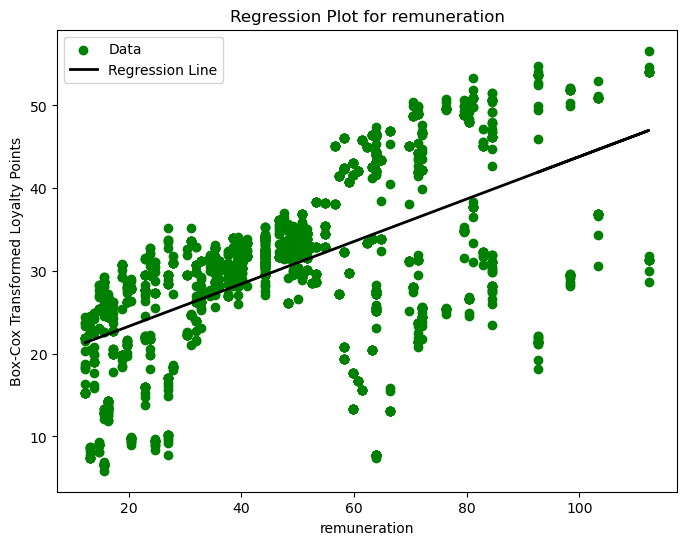

Regression Summary for remuneration:
                              OLS Regression Results                             
Dep. Variable:     loyalty_points_boxcox   R-squared:                       0.352
Model:                               OLS   Adj. R-squared:                  0.352
Method:                    Least Squares   F-statistic:                     1086.
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):          1.26e-190
Time:                           08:15:21   Log-Likelihood:                -7007.0
No. Observations:                   2000   AIC:                         1.402e+04
Df Residuals:                       1998   BIC:                         1.403e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

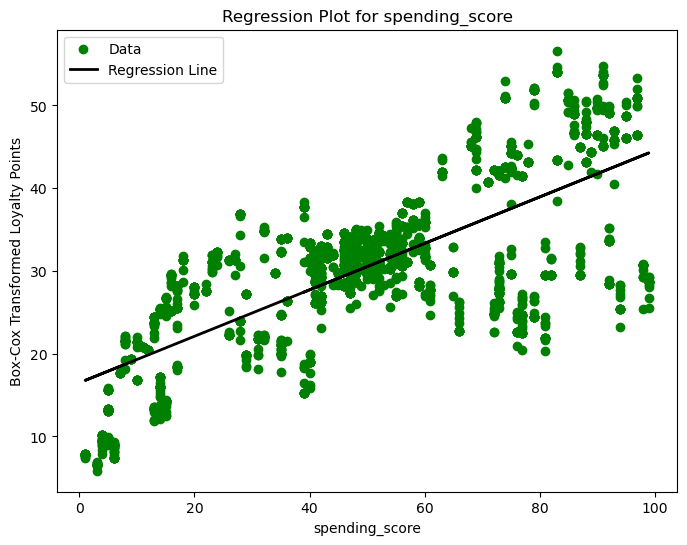

Regression Summary for spending_score:
                              OLS Regression Results                             
Dep. Variable:     loyalty_points_boxcox   R-squared:                       0.537
Model:                               OLS   Adj. R-squared:                  0.536
Method:                    Least Squares   F-statistic:                     2313.
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                           08:15:21   Log-Likelihood:                -6672.2
No. Observations:                   2000   AIC:                         1.335e+04
Df Residuals:                       1998   BIC:                         1.336e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [66]:
# 5. Plot the linear regression and add a regression line.

# Create a list of independent variable names for labeling plots.
independent_vars = ['age', 'remuneration', 'spending_score']

# 2. Create the OLS model, extract estimated parameters, standard errors, and predicted values.
for var in independent_vars:
    # Create a new X dataframe with only the current independent variable.
    X_var = df[var]
    X_var = sm.add_constant(X_var)
    
    # Fit the OLS model.
    model = sm.OLS(y, X_var).fit()
    
    # Predicted values for the current independent variable.
    predictions = model.predict(X_var)

    # 3. Plot the linear regression and add a regression line.
    plt.figure(figsize=(8, 6), dpi=100)
    
    # Scatterplot of the data points.
    plt.scatter(df[var], y, color='green', label='Data')
    
    # Add the regression line.
    plt.plot(df[var], predictions, color='black', linewidth=2, label='Regression Line')
    
    # Set labels and legend.
    plt.xlabel(var)
    plt.ylabel('Box-Cox Transformed Loyalty Points')
    plt.title(f'Regression Plot for {var}')
    plt.legend()
    
    # Show the plot for the current independent variable.
    plt.show()
    
    # Display regression summary (optional).
    print(f"Regression Summary for {var}:")
    print(model.summary())

In [67]:
# Checking the value of R-squared, intercept, and coefficients.
print("R-squared:", model.rsquared)  # R-squared value
print("Intercept:", model.params['const'])  # Intercept
print("Coefficients:", model.params[1:])  # Coefficients (excluding the constant term)

R-squared: 0.5365131022263205
Intercept: 16.475644503834232
Coefficients: spending_score    0.280507
dtype: float64


__R-squared (R²):__ In this case, the R-squared for the Box-Cox transformed loyalty points (0.903) is higher than the R-squared for the original loyalty points (0.840), suggesting that the transformed data provides a better fit to the model.

__Adjusted R-squared:__ The adjusted R-squared accounts for the number of independent variables and is used to penalize overfitting. It provides a measure of how well the model generalizes to new data. In both cases, the adjusted R-squared values are close to the R-squared values, indicating that the number of independent variables is not excessive.

__Parameter Estimates:__ In both cases, the coefficients for 'age,' 'remuneration,' and 'spending_score' are provided. These coefficients indicate the direction and magnitude of the effect of each independent variable on the dependent variable.

__Statistical Significance:__ Smaller p-values indicate that the coefficients are statistically significant. In both cases, the coefficients are statistically significant (p-values close to 0), suggesting that these variables are important for the model.

__Residuals Analysis:__ The first model (original loyalty points) has a Durbin-Watson statistic of 3.453, which suggests a potential issue with autocorrelation. The second model (Box-Cox transformed loyalty points) has a Durbin-Watson statistic of 1.729, indicating less of an issue with autocorrelation.

Omnibus and Jarque-Bera Tests: Assesses normality and distribution of residuals. The first model (original loyalty points) shows signs of skewness (Skew) and kurtosis (Kurtosis), while the second model (Box-Cox transformed loyalty points) has lower skewness and kurtosis, indicating a more normal distribution of residuals.

Overall, the model using Box-Cox transformed loyalty points appears to provide a better fit and meets some of the assumptions of linear regression more effectively. 

#### Evaluate the predictive performance of original loyalty points OLS model 

In [68]:
# 1. Specify the independent and dependent variables for the original loyalty points.
y = df['loyalty_points']  # Dependent variable (target)
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables (features)

# 2. Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the OLS model.
mlr = linear_model.LinearRegression()
mlr.fit(X_train, y_train)

# 4. Make predictions on the test dataset.
y_pred = mlr.predict(X_test)
residuals = y_test - y_pred

# 5. Calculate evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics.
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 402.23503056376927
Mean Squared Error (MSE): 277188.7023322059
Root Mean Squared Error (RMSE): 526.4871340614184


In [69]:
# Check for multicollinearity 
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term to the model

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014


In [70]:
# Check for heteroscedasticity
# Calculate residuals
bp_test = het_breuschpagan(residuals, X_test)
print("Breusch-Pagan Test for Heteroscedasticity:")
print("LM Statistic:", bp_test[0])
print("LM-Test P-Value:", bp_test[1])
print("F-Stat P-Value:", bp_test[3])

Breusch-Pagan Test for Heteroscedasticity:
LM Statistic: 134.6590325153694
LM-Test P-Value: 5.7433147839182585e-30
F-Stat P-Value: 3.8381170984843e-35


#### Evaluate the predictive performance of the Box-Cox transformed OLS model 

In [71]:
# Define the independent variables (features) and the dependent variable (target).
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables (features)
y = df['loyalty_points_boxcox']  # Dependent variable (target)

# 1. Split the dataset into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a new OLS model and fit it to the training data.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# 3. Make predictions on the test dataset.
y_pred = model.predict(sm.add_constant(X_test))

# 4. Calculate the Mean Absolute Error (MAE).
mae = mean_absolute_error(y_test, y_pred)

# 5. Calculate the Mean Squared Error (MSE).
mse = mean_squared_error(y_test, y_pred)

# 6. Calculate the Root Mean Squared Error (RMSE).
rmse = np.sqrt(mse)

# Print the performance metrics.
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 7. Calculate residuals.
residuals = y_test - y_pred

# 8. Run the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(residuals, X_test)
print("Breusch-Pagan Test for Heteroscedasticity:")
print("LM Statistic:", bp_test[0])
print("LM-Test P-Value:", bp_test[1])
print("F-Stat P-Value:", bp_test[3])

Mean Absolute Error (MAE): 2.2214744763853274
Mean Squared Error (MSE): 7.892403230543878
Root Mean Squared Error (RMSE): 2.8093421348322596
Breusch-Pagan Test for Heteroscedasticity:
LM Statistic: 106.50320610842937
LM-Test P-Value: 7.466595789292858e-24
F-Stat P-Value: 1.6909620281751693e-26


In summary, the lower these error metrics (MAE, MSE, RMSE), the better the regression model is at making predictions. An MAE of 2.22, MSE of 7.89, and RMSE of 2.81 suggest that the model's predictions are reasonably accurate, with low prediction errors. 

### Comparing the two models:

MAE: The MAE for the Box-Cox transformed model (2.22) is significantly lower than that of the original model (402.24). A lower MAE indicates that the Box-Cox transformed model has smaller errors on average when making predictions.

MSE: The MSE for the Box-Cox transformed model (7.89) is substantially lower than that of the original model (277,188.70). A lower MSE means that the Box-Cox transformed model's predictions are closer to the actual values.

RMSE: The RMSE for the Box-Cox transformed model (2.81) is also much lower than that of the original model (526.49). A lower RMSE suggests that the Box-Cox transformed model's predictions are more accurate and have smaller errors.

In summary, the Box-Cox transformed model significantly outperforms the original model in terms of predictive performance. It has much smaller errors and is a better fit for the data, which indicates that the Box-Cox transformation has improved the model's ability to make accurate predictions.

### Heteroscedasticity

In both cases, the LM Statistic is relatively high. This indicates that there is evidence of heteroscedasticity in both models.

__LM-Test P-Value:__ The LM-Test P-Value measures the statistical significance of the LM Statistic.
In both cases, the LM-Test P-Value is very close to zero (e.g., 5.7433147839182585e-30 and 7.466595789292858e-24).
A very low p-value (close to zero) suggests strong evidence against the null hypothesis of homoscedasticity (constant variance) and indicates the presence of heteroscedasticity.

__F-Stat P-Value:__ The F-Stat P-Value is another way to measure the statistical significance of the heteroscedasticity.
Like the LM-Test P-Value, the F-Stat P-Value is also very close to zero (e.g., 3.8381170984843e-35 and 1.6909620281751693e-26).
A low F-Stat P-Value indicates strong evidence against the null hypothesis of homoscedasticity.

In both the original and Box-Cox transformed models, the results of the Breusch-Pagan test strongly suggest the presence of heteroscedasticity in the residuals.
Heteroscedasticity can be problematic because it violates one of the assumptions of linear regression, which assumes that the variance of the residuals is constant across all levels of the independent variables.
When heteroscedasticity is present, it may affect the validity of the statistical inferences and the performance of the model. 

In summary, both models exhibit signs of heteroscedasticity based on the Breusch-Pagan test results. Further analysis or corrective actions may be needed to address this issue and improve the model's performance (outisde the scope of this project).

# 

# 2: Clustering with *k*-means using Python

## 1. Load and explore the data

In [72]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [73]:
# View the existing DataFrame
df

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  log_loyalty_points  \
0     The fact that 50% of this space is wasted on a...            5.347108   
1     Another worthless Dungeon Master's screen from...            6.261492   
2                       pretty, but also pretty useless            3.688879   
3                                            Five Stars            6.331502   
4                                            Money trap            5.902633   
...                                                 ...                 ...   
1995     The perfect word game for mixed ages (with Mom            8.301770   
1996                                          Super fun            6.289716   
1997                                         Great Game            8.633019   
1998                                         Four Stars            6.954639   
1999                                     Love this game            6.171701   

      loyalty_points_boxcox  
0                 15.221535  
1                 21.861599  
2                  7.382386  
3                 22.460458  
4                 19.006629  
...                     ...  
1995              46.773284  
1996              22.101305  
1997              52.715181  
1998              28.470271  
1999              21.114162  

[2000 rows x 11 columns]

In [74]:
# Load the CSV file(s) as df2.
df2 = df[['remuneration', 'spending_score']]

# View DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [75]:
# Explore the data.
print(df2.columns)

Index(['remuneration', 'spending_score'], dtype='object')


In [76]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

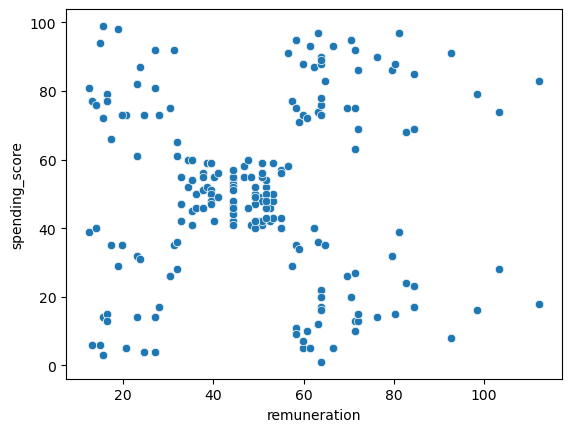

In [77]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score', 
                data=df2)

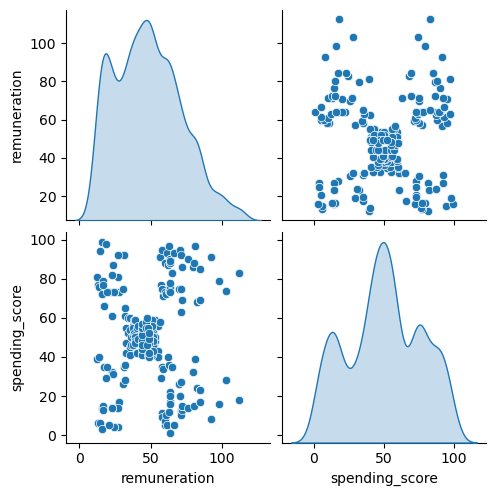

In [78]:
# Create a pairplot with Seaborn.
# Create a pairplot with Seaborn.
x = df[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

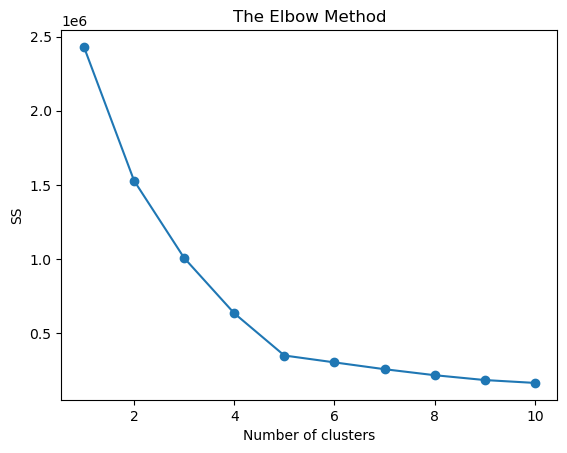

In [79]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

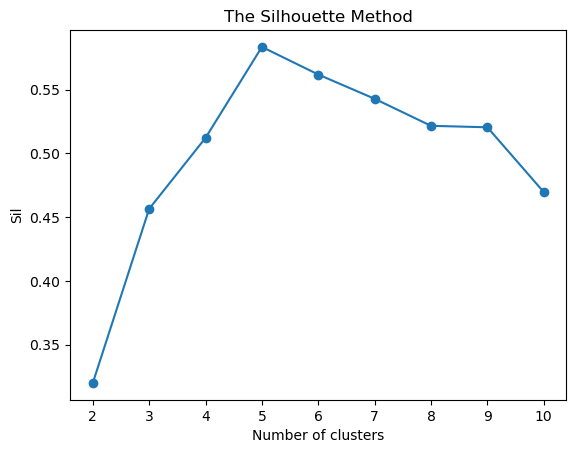

In [80]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

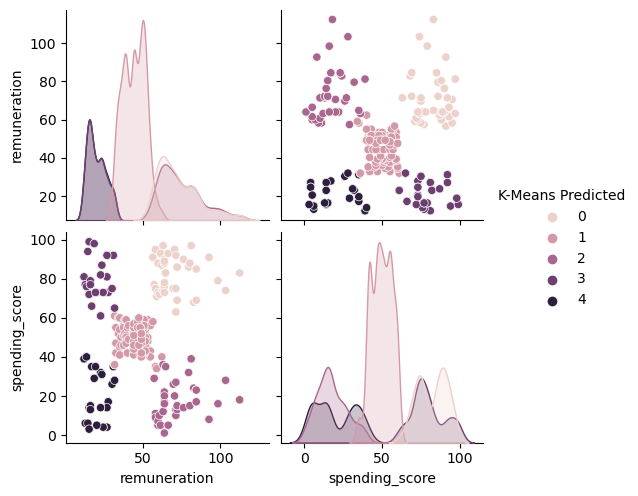

In [81]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [82]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

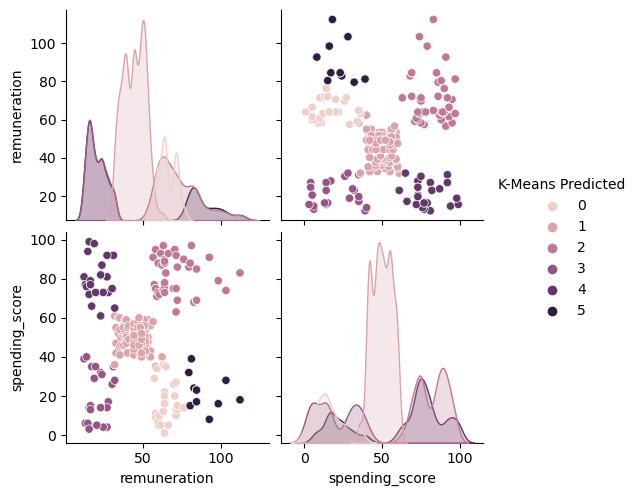

In [83]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [84]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
0    214
5    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

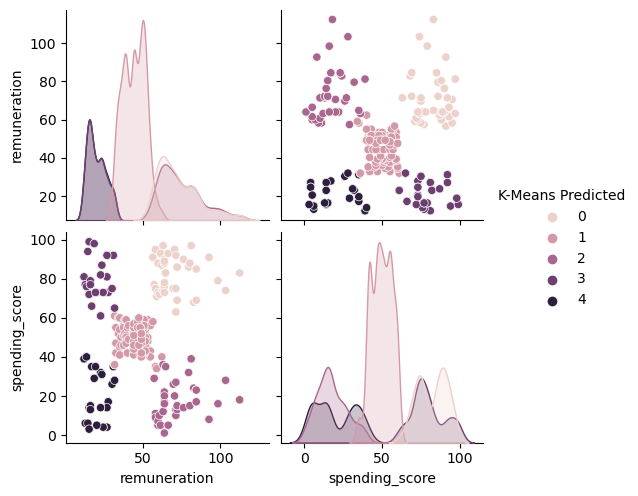

In [85]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [86]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [87]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


remuneration  spending_score  K-Means Predicted
0            12.30              39                  4
1            12.30              81                  3
2            13.12               6                  4
3            13.12              77                  3
4            13.94              40                  4
...            ...             ...                ...
1995         84.46              69                  0
1996         92.66               8                  2
1997         92.66              91                  0
1998         98.40              16                  2
1999         92.66               8                  2

[2000 rows x 3 columns]

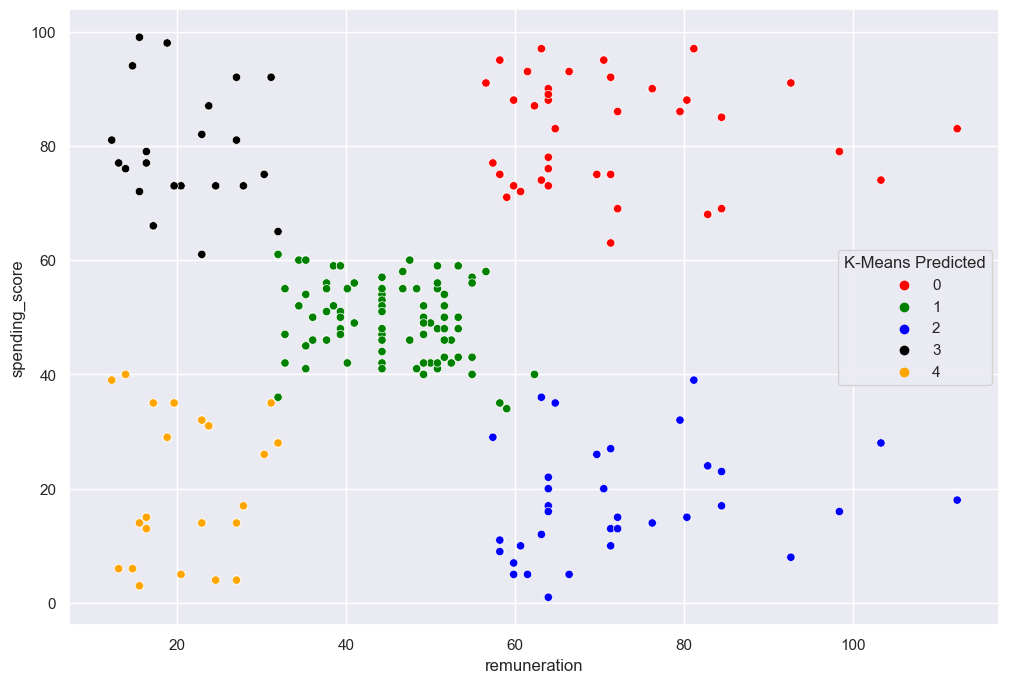

In [88]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
x

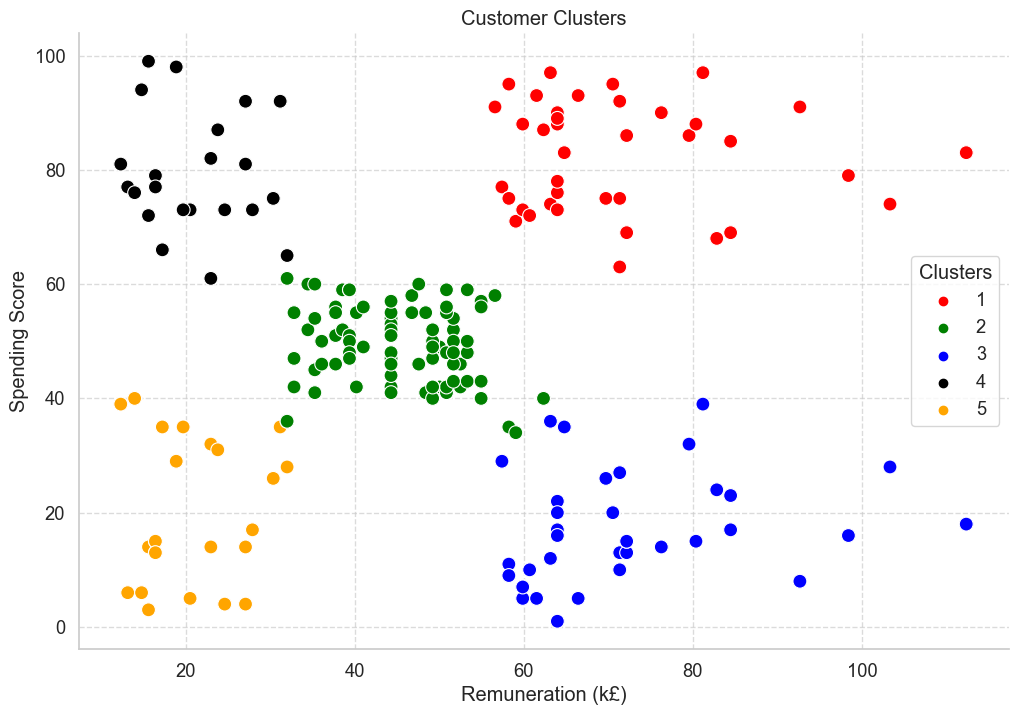

In [89]:
# Set a larger figure size and style for better presentation

# Increment cluster labels by 1
x['K-Means Predicted'] = x['K-Means Predicted'] + 1

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=1.2)

# Define a custom color palette for your clusters
custom_palette = ['red', 'green', 'blue', 'black', 'orange']

# Create the scatterplot with improved aesthetics
scatterplot = sns.scatterplot(x='remuneration',
                              y='spending_score',
                              data=x,
                              hue='K-Means Predicted',
                              palette=custom_palette,
                              s=100)  # Increase the size of data points

# Set labels for axes and a title
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')

# Customize legend position and title
plt.legend(title='Clusters', loc='center right')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Save the figure as a PNG file
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight') 

# Display the plot
plt.show()

## 7. Discuss: Insights and observations

The number of predicted values per class indicates a better distribution for k=5 than k=6. There is a clear separation of data points into these five distinct clusters. The eblow point, where are the rate of decrease in SSD starts to slow down, forming an elbow-like shape, seems to be most evident at k=5. k=5 also corresponds to the highest sillhouette score, indicating a clustering configuration that balances cohesion and separation effectively. It quantifies how similar data points within the same cluster are to each other (cohesion) compared to how dissimilar they are to data points in other clusters (separation). It Maximises the overall similarity within clusters and minimises the dissimilarity between clusters, leading to a more accurate and interpretable clustering solution.

Cluster customers into 5 distinct groups, low earner - low spender, Develope tailored marketing strategies to each of these groups such as Deals, vouchers, discounts for low earner high spenders. On Low spending side there's no need to waste money or time trying to get them in, limited return. High earners, low spenders, more effort to market towards them to get into into higher spending category. 

# 

# 3: NLP using Python

## 1. Load and explore the data

In [90]:
# !pip install wordcloud

In [91]:
# !pip install textblob

In [92]:
# !python -m textblob.download_corpora

In [93]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download('words')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

stop_words = set(stopwords.words('english'))

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/RyanLin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/RyanLin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/RyanLin/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [94]:
# Load the data set as df3.
df3 = df

# View DataFrame.
df3

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  log_loyalty_points  \
0     The fact that 50% of this space is wasted on a...            5.347108   
1     Another worthless Dungeon Master's screen from...            6.261492   
2                       pretty, but also pretty useless            3.688879   
3                                            Five Stars            6.331502   
4                                            Money trap            5.902633   
...                                                 ...                 ...   
1995     The perfect word game for mixed ages (with Mom            8.301770   
1996                                          Super fun            6.289716   
1997                                         Great Game            8.633019   
1998                                         Four Stars            6.954639   
1999                                     Love this game            6.171701   

      loyalty_points_boxcox  
0                 15.221535  
1                 21.861599  
2                  7.382386  
3                 22.460458  
4                 19.006629  
...                     ...  
1995              46.773284  
1996              22.101305  
1997              52.715181  
1998              28.470271  
1999              21.114162  

[2000 rows x 11 columns]

In [95]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 2000 non-null   object 
 1   age                    2000 non-null   int64  
 2   remuneration           2000 non-null   float64
 3   spending_score         2000 non-null   int64  
 4   loyalty_points         2000 non-null   int64  
 5   education              2000 non-null   object 
 6   product                2000 non-null   int64  
 7   review                 2000 non-null   object 
 8   summary                2000 non-null   object 
 9   log_loyalty_points     2000 non-null   float64
 10  loyalty_points_boxcox  2000 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 172.0+ KB


In [96]:
# Keep necessary columns. Drop unnecessary columns.
df3_filtered = df3[['review', 'summary']]

# View DataFrame.
df3_filtered

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [97]:
# Determine if there are any missing values.
missing_values = df3_filtered.isnull()

# Check if there are any missing values in the entire DataFrame
if missing_values.any().any():
    print("There are missing values in df3_filtered.")
else:
    print("There are no missing values in df3_filtered.")

There are no missing values in df3_filtered.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [98]:
# Review: Change all to lower case and join with a space.
df3_filtered['review'] = df3_filtered['review'].str.lower()

In [99]:
# Summary: Change all to lower case and join with a space.
df3_filtered['summary'] = df3_filtered['summary'].str.lower()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [100]:
import string

In [101]:
# Replace all the punctuations in review column.
df3_filtered['review'] = df3_filtered['review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# View output.
df3_filtered['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9\n\nyour unpainted...
2       nice art nice printing  why two panels are fil...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game  did not think i would like it when...
1997            great game for all\nkeeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [102]:
# Replace all the puncuations in summary column.
df3_filtered['summary'] = df3_filtered['summary'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# View output.
df3_filtered['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [103]:
# Drop duplicates in both columns.
df3_filtered.drop_duplicates(subset=['review', 'summary'], inplace=True)

# View DataFrame.
df3_filtered

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

The DataFrame went from 2000 rows to 1961 rows, indicating there were 39 duplicate rows of the review and summary columns

## 3. Tokenise and create wordclouds

In [104]:
# Create new DataFrame (copy DataFrame).
df_copy = df3_filtered.copy()

# View DataFrame.
df_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

In [105]:
# Apply tokenisation to both columns.
df_copy['review_tokens'] = df_copy['review'].apply(lambda x: word_tokenize(x))
df_copy['summary_tokens'] = df_copy['summary'].apply(lambda x: word_tokenize(x))

# View DataFrame.
df_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, w...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                        [fun, game]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1995  [the, perfect, word, game, for, mixed, ages, w...  
1996                                       [super, fun]  
1997                                      [great, game]  
1998                                      [four, stars]  
1999                                 [love, this, game]  

[1961 rows x 4 columns]

In [106]:
# Create and plot word cloud images
def plot_word_cloud(column_name):
    # Flatten the list of lists of tokenized words and join them into a single string
    text = ' '.join(' '.join(tokens) for tokens in column_name)
    
    # Create and plot the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

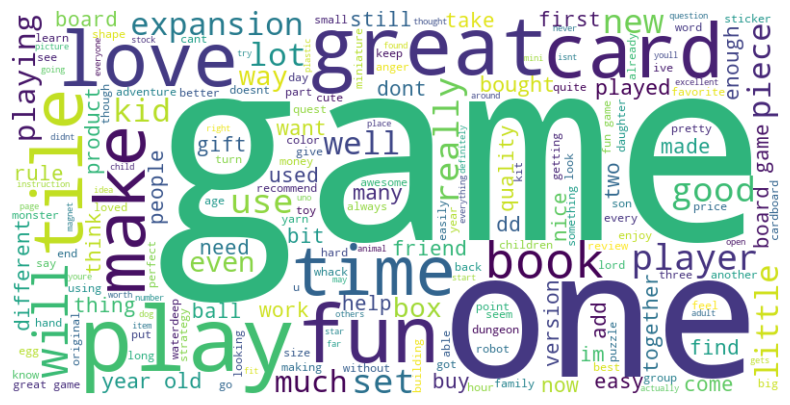

In [107]:
# Review: Plot the WordCloud image.
plot_word_cloud(df_copy['review_tokens'])

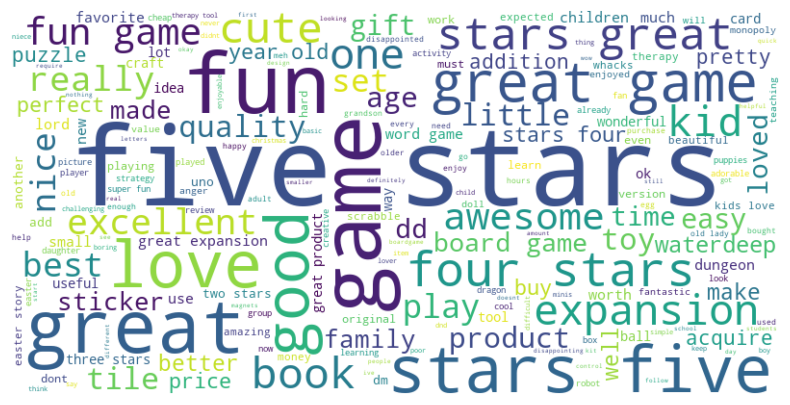

In [108]:
# Summary: Plot the WordCloud image.
plot_word_cloud(df_copy['summary_tokens'])

## 4. Frequency distribution and polarity

### 4a) Remove alphanumeric characters and stopwords

In [109]:
# Function to preprocess text: remove punctuation and stopwords
def preprocess_text(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

In [110]:
# Apply preprocessing to 'review_tokens' and 'summary_tokens'
df_copy['review_tokens'] = df_copy['review_tokens'].apply(preprocess_text)
df_copy['summary_tokens'] = df_copy['summary_tokens'].apply(preprocess_text)

In [111]:
# View DataFrame with cleaned tokens
print("DataFrame with Cleaned Tokens:")
print(df_copy[['review_tokens', 'summary_tokens']])

DataFrame with Cleaned Tokens:
                                          review_tokens  \
0     [comes, dms, screen, space, screen, absolute, ...   
1     [open, letter, unpainted, miniatures, bad, spe...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, previous, screens, completely, unnece...   
...                                                 ...   
1995  [perfect, word, game, mixed, ages, mom, perhap...   
1996  [great, game, think, would, like, first, recei...   
1997                 [great, game, keeps, mind, nimble]   
1998                                        [fun, game]   
1999  [game, fun, lot, like, scrabble, without, litt...   

                                         summary_tokens  
0     [fact, space, wasted, art, terribly, informati...  
1        [another, worthless, dungeon, masters, screen]  
2                       [pretty, also, pretty, useless]  
3                           

### 4b) Create frequency distribution

In [112]:
# Determine Frequency Distribution for 'review_tokens'
all_review_words = [word for tokens in df_copy['review_tokens'] for word in tokens]
fdist_review = FreqDist(all_review_words)

In [113]:
# Display Frequency Distribution for 'review_tokens'
print("\nFrequency Distribution for 'review_tokens':")
print(fdist_review.most_common(15))  # Print the 15 most common words


Frequency Distribution for 'review_tokens':
[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]


In [114]:
# Determine Frequency Distribution for 'summary_tokens'
all_summary_words = [word for tokens in df_copy['summary_tokens'] for word in tokens]
fdist_summary = FreqDist(all_summary_words)

In [115]:
# Display Frequency Distribution for 'summary_tokens'
print("\nFrequency Distribution for 'summary_tokens':")
print(fdist_summary.most_common(15))  # Print the 15 most common words


Frequency Distribution for 'summary_tokens':
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]


### 4c) Create wordcloud without stopwords

In [116]:
# Create and plot word cloud images
def plot_word_cloud(column_name):
    # Flatten the list of lists of cleaned tokens and join them into a single string
    text = ' '.join(' '.join(tokens) for tokens in column_name)
    
    # Create and plot the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

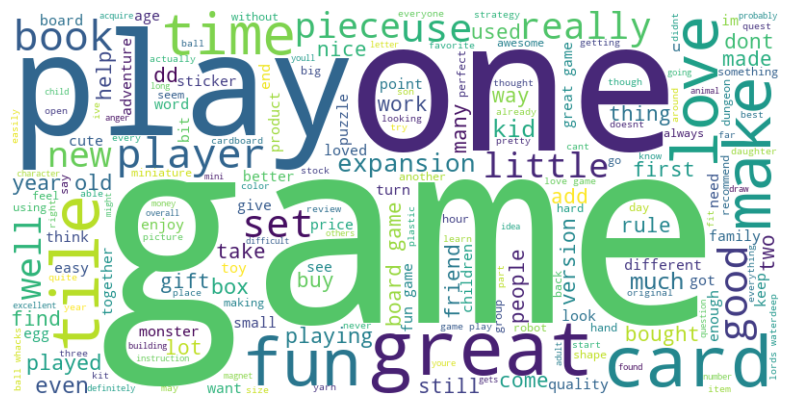

In [117]:
# Review: Plot the WordCloud image.
plot_word_cloud(df_copy['review_tokens'])

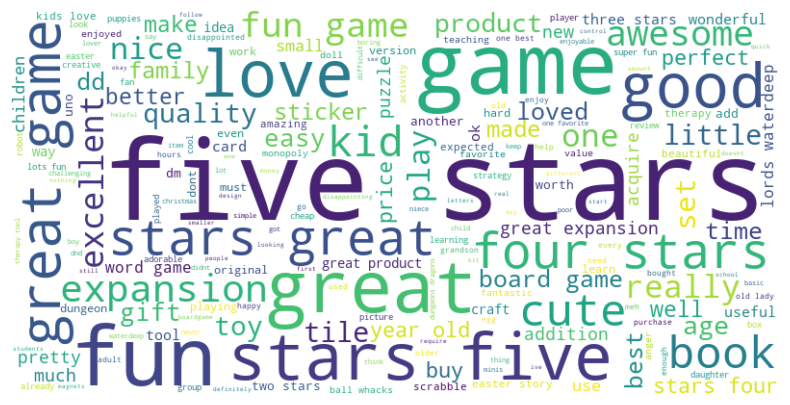

In [118]:
# Summary: Plot the WordCloud image.
plot_word_cloud(df_copy['summary_tokens'])

#### Combined Word Cloud

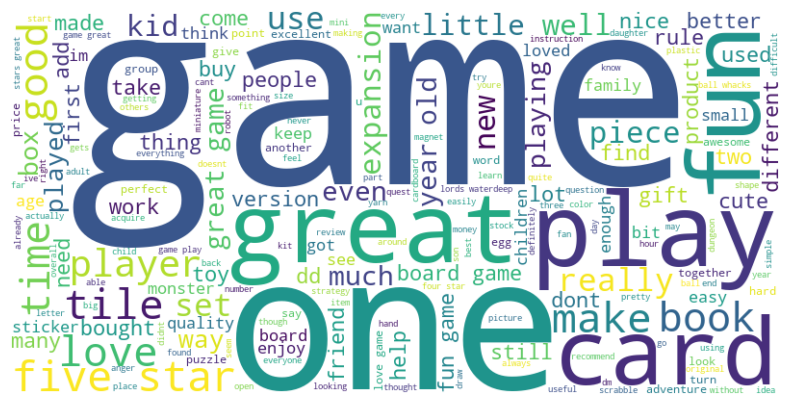

In [119]:
# Combine 'review_tokens' and 'summary_tokens' into a single list of words
all_words = [word for tokens in df_copy['review_tokens'] + df_copy['summary_tokens'] for word in tokens]

# Join all words into a single string
text = ' '.join(all_words)

# Create and plot the word cloud for combined tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud as a PNG file
# wordcloud.to_file("wordcloud.png")

In [120]:
# Create Frequency Distribution for 'all_words'
fdist_all_words = FreqDist(all_words)

# Display Frequency Distribution for 'all_words'
print("Frequency Distribution for 'all_words':")
# Display the 15 most common words
display(fdist_all_words.most_common(15))  

Frequency Distribution for 'all_words':


[('game', 1990),
 ('great', 875),
 ('fun', 770),
 ('one', 568),
 ('play', 528),
 ('like', 468),
 ('stars', 464),
 ('love', 416),
 ('good', 381),
 ('five', 362),
 ('really', 349),
 ('get', 333),
 ('tiles', 317),
 ('book', 316),
 ('time', 309)]

### 4d) Identify 15 most common words and polarity

In [121]:
# Define a function to calculate sentiment polarity for a word
def calculate_polarity(word):
    blob = TextBlob(word)
    return blob.sentiment.polarity

In [122]:
# Get the 15 most common words for 'review_tokens'
common_review_words = fdist_review.most_common(15)

# Calculate sentiment polarity for common 'review_tokens' words
sentiments_review = {word: calculate_polarity(word) for word, _ in common_review_words}
value_counts_review = {word: count for word, count in common_review_words}

In [123]:
# Display common words and their sentiment polarities for 'review_tokens'
print("Sentiment Analysis for 'review_tokens'")
for word, polarity in sentiments_review.items():
    print(f'Word: {word}, Count: {value_counts_review[word]}, Polarity: {polarity:.2f}')

Sentiment Analysis for 'review_tokens'
Word: game, Count: 1671, Polarity: -0.40
Word: great, Count: 580, Polarity: 0.80
Word: fun, Count: 552, Polarity: 0.30
Word: one, Count: 530, Polarity: 0.00
Word: play, Count: 502, Polarity: 0.00
Word: like, Count: 414, Polarity: 0.00
Word: love, Count: 323, Polarity: 0.50
Word: really, Count: 319, Polarity: 0.20
Word: get, Count: 319, Polarity: 0.00
Word: cards, Count: 301, Polarity: 0.00
Word: tiles, Count: 297, Polarity: 0.00
Word: time, Count: 291, Polarity: 0.00
Word: good, Count: 289, Polarity: 0.70
Word: would, Count: 280, Polarity: 0.00
Word: book, Count: 273, Polarity: 0.00


In [124]:
# Get the 15 most common words for 'summary_tokens'
common_summary_words = fdist_summary.most_common(15)

# Calculate sentiment polarity for common 'summary_tokens' words
sentiments_summary = {word: calculate_polarity(word) for word, _ in common_summary_words}
value_counts_summary = {word: count for word, count in common_summary_words}

In [125]:
# Display common words and their sentiment polarities for 'summary_tokens'
print("\nSentiment Analysis for 'summary_tokens'")
for word, polarity in sentiments_summary.items():
    print(f'Word: {word}, Count: {value_counts_summary[word]}, Polarity: {polarity:.2f}')


Sentiment Analysis for 'summary_tokens'
Word: stars, Count: 427, Polarity: 0.00
Word: five, Count: 342, Polarity: 0.00
Word: game, Count: 319, Polarity: -0.40
Word: great, Count: 295, Polarity: 0.80
Word: fun, Count: 218, Polarity: 0.30
Word: love, Count: 93, Polarity: 0.50
Word: good, Count: 92, Polarity: 0.70
Word: four, Count: 58, Polarity: 0.00
Word: like, Count: 54, Polarity: 0.00
Word: expansion, Count: 52, Polarity: 0.00
Word: kids, Count: 50, Polarity: 0.00
Word: cute, Count: 45, Polarity: 0.50
Word: book, Count: 43, Polarity: 0.00
Word: one, Count: 38, Polarity: 0.00
Word: awesome, Count: 36, Polarity: 1.00


In [126]:
# Get the 15 most common words for 'all_words' and calculate sentiment polarity
common_all_words = fdist_all_words.most_common(15)
sentiments_all_words = {word: calculate_polarity(word) for word, _ in common_all_words}
value_counts_all_words = {word: count for word, count in common_all_words}

# Display common words and their sentiment polarities for 'all_words'
print("\nSentiment Analysis for 'all_words'")
for word, polarity in sentiments_all_words.items():
    print(f'Word: {word}, Count: {value_counts_all_words[word]} Polarity: {polarity:.2f}')


Sentiment Analysis for 'all_words'
Word: game, Count: 1990 Polarity: -0.40
Word: great, Count: 875 Polarity: 0.80
Word: fun, Count: 770 Polarity: 0.30
Word: one, Count: 568 Polarity: 0.00
Word: play, Count: 528 Polarity: 0.00
Word: like, Count: 468 Polarity: 0.00
Word: stars, Count: 464 Polarity: 0.00
Word: love, Count: 416 Polarity: 0.50
Word: good, Count: 381 Polarity: 0.70
Word: five, Count: 362 Polarity: 0.00
Word: really, Count: 349 Polarity: 0.20
Word: get, Count: 333 Polarity: 0.00
Word: tiles, Count: 317 Polarity: 0.00
Word: book, Count: 316 Polarity: 0.00
Word: time, Count: 309 Polarity: 0.00


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [127]:
# Provided function.
# Function to calculate sentiment polarity for a list of words
def extract_polarity(comment):
    return TextBlob(' '.join(comment)).sentiment.polarity

In [128]:
# Calculate polarity for 'review_tokens' column
df_copy['review_polarity'] = df_copy['review_tokens'].apply(extract_polarity)

# Calculate polarity for 'summary_tokens' column
df_copy['summary_polarity'] = df_copy['summary_tokens'].apply(extract_polarity)

# Combine 'review_tokens' and 'summary_tokens' into a single list of words for 'all_words'
df_copy['all_words'] = df_copy['review_tokens'] + df_copy['summary_tokens']

# Calculate polarity for 'all_words' column
df_copy['all_words_polarity'] = df_copy['all_words'].apply(extract_polarity)

# View output.
display(df_copy)

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          review_tokens  \
0     [comes, dms, screen, space, screen, absolute, ...   
1     [open, letter, unpainted, miniatures, bad, spe...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, previous, screens, completely, unnece...   
...                                                 ...   
1995  [perfect, word, game, mixed, ages, mom, perhap...   
1996  [great, game, think, would, like, first, recei...   
1997                 [great, game, keeps, mind, nimble]   
1998                                        [fun, game]   
1999  [game, fun, lot, like, scrabble, without, litt...   

                                         summary_tokens  review_polarity  \
0     [fact, space, wasted, art, terribly, informati...        -0.242857   
1        [another, worthless, dungeon, masters, screen]        -0.019468   
2                       [pretty, also, pretty, useless]         0.118243   
3                                         [five, stars]         0.578788   
4                                         [money, trap]        -0.316667   
...                                                 ...              ...   
1995            [perfect, word, game, mixed, ages, mom]         0.168750   
1996                                       [super, fun]         0.158333   
1997                                      [great, game]         0.200000   
1998                                      [four, stars]        -0.050000   
1999                                       [love, game]        -0.095833   

      summary_polarity                                          all_words  \
0            -0.600000  [comes, dms, screen, space, screen, absolute, ...   
1            -0.800000  [open, letter, unpainted, miniatures, bad, spe...   
2             0.000000  [nice, art, nice, printing, two, panels, fille...   
3             0.000000  [amazing, buy, bought, gift, new, dm, perfect,...   
4             0.000000  [review, previous, screens, completely, unnece...   
...                ...                                                ...   
1995          0.200000  [perfect, word, game, mixed, ages, mom, perhap...   
1996          0.316667  [great, game, think, would, like, first, recei...   
1997          0.200000    [great, game, keeps, mind, nimble, great, game]   
1998          0.000000                           [fun, game, four, stars]   
1999          0.050000  [game, fun, lot, like, scrabble, without, litt...   

      all_words_polarity  
0              -0.322222  
1              -0.062831  
2  

In [129]:
df_copy.describe()

review_polarity  summary_polarity  all_words_polarity
count      1961.000000       1961.000000         1961.000000
mean          0.210735          0.224019            0.231060
std           0.268045          0.340938            0.265888
min          -1.000000         -1.000000           -1.000000
25%           0.033333          0.000000            0.055871
50%           0.178125          0.100000            0.200000
75%           0.358333          0.500000            0.390000
max           1.000000          1.000000            1.000000

### Histograms for Polarity

Text(0, 0.5, 'Frequency')

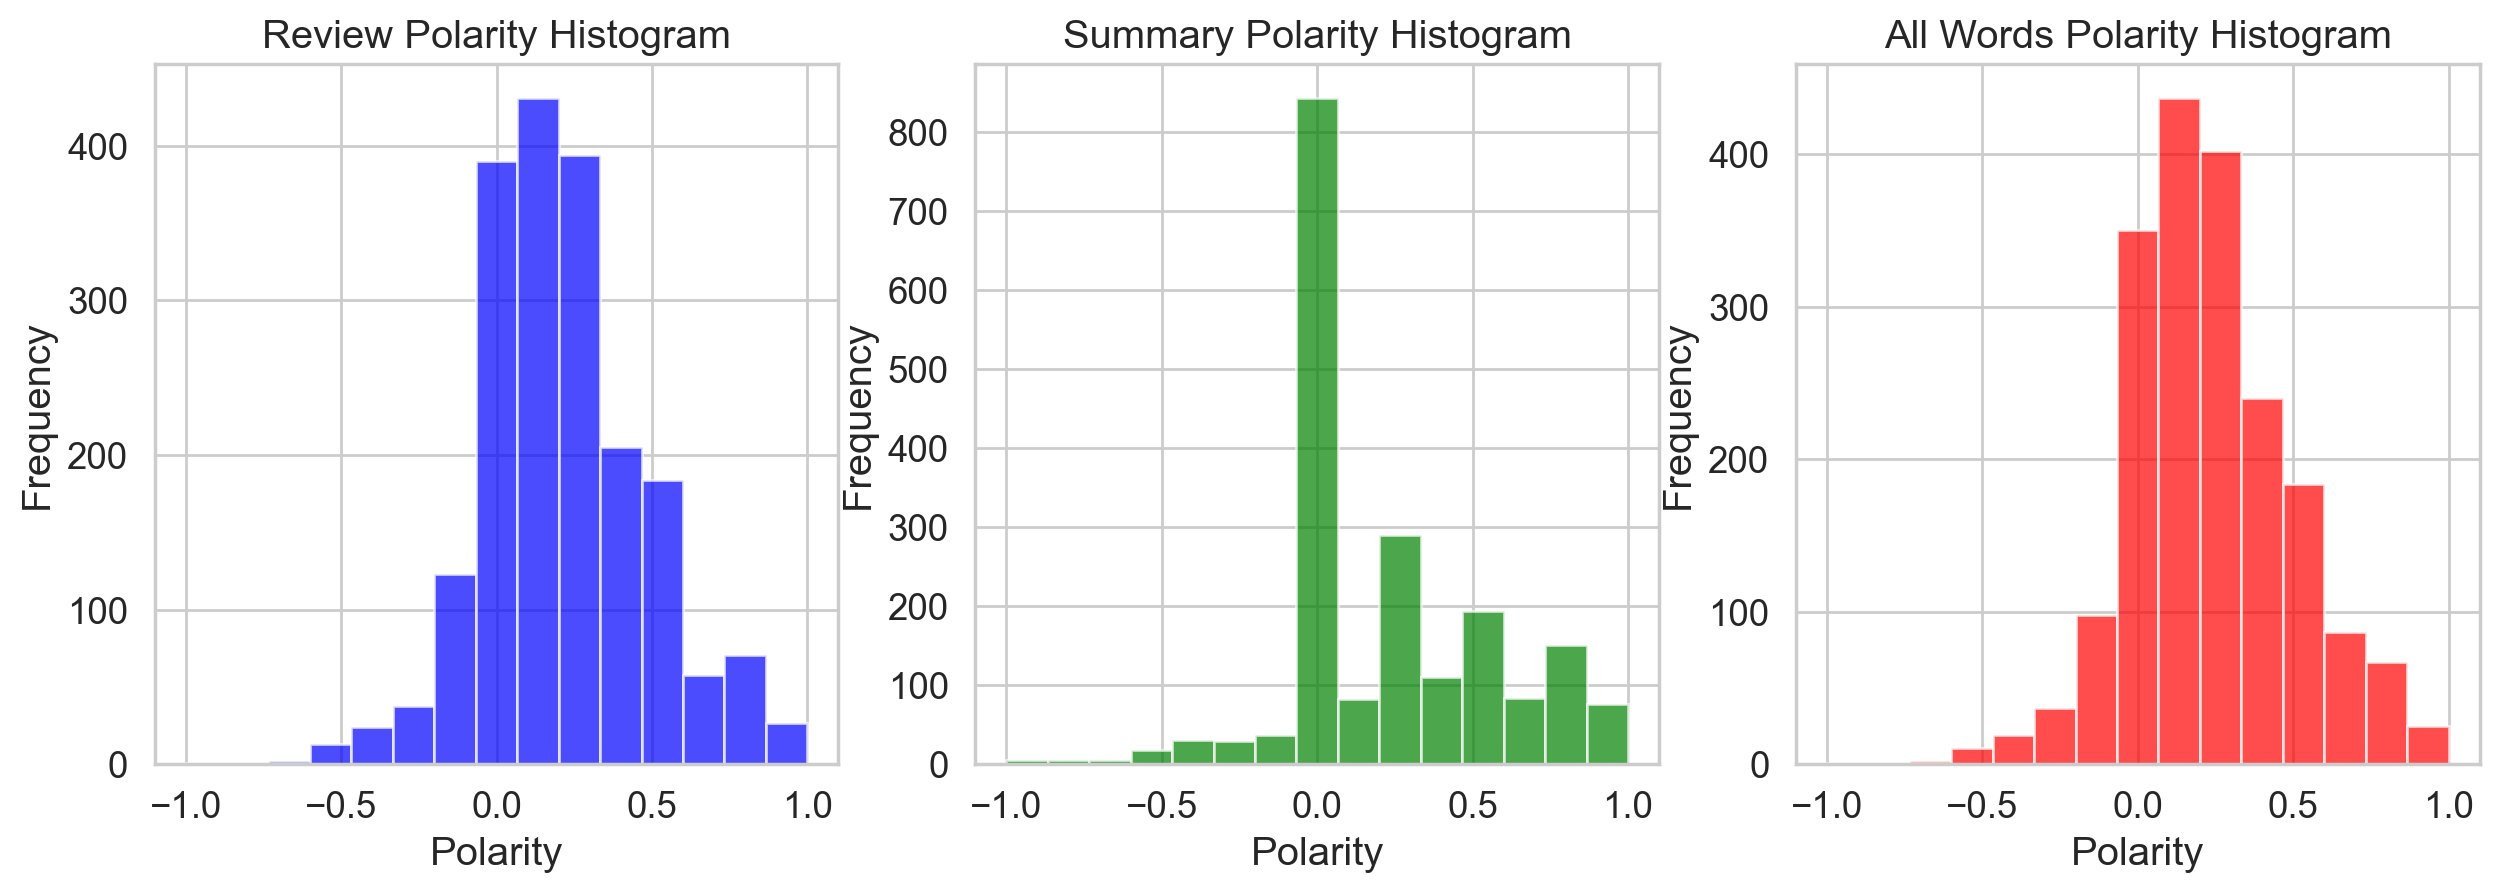

In [130]:
# Create histograms with 15 bins for each column
plt.figure(figsize=(15, 10), dpi=200)

# Review Polarity
plt.subplot(231)
plt.hist(df_copy['review_polarity'], bins=15, color='blue', alpha=0.7)
plt.title('Review Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Summary Polarity
plt.subplot(232)
plt.hist(df_copy['summary_polarity'], bins=15, color='green', alpha=0.7)
plt.title('Summary Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# All Words Polarity
plt.subplot(233)
plt.hist(df_copy['all_words_polarity'], bins=15, color='red', alpha=0.7)
plt.title('All Words Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Save the entire figure as a PNG file
# plt.savefig("histograms_figure.png", bbox_inches='tight')

### Histograms for Sentiment Subjectivity

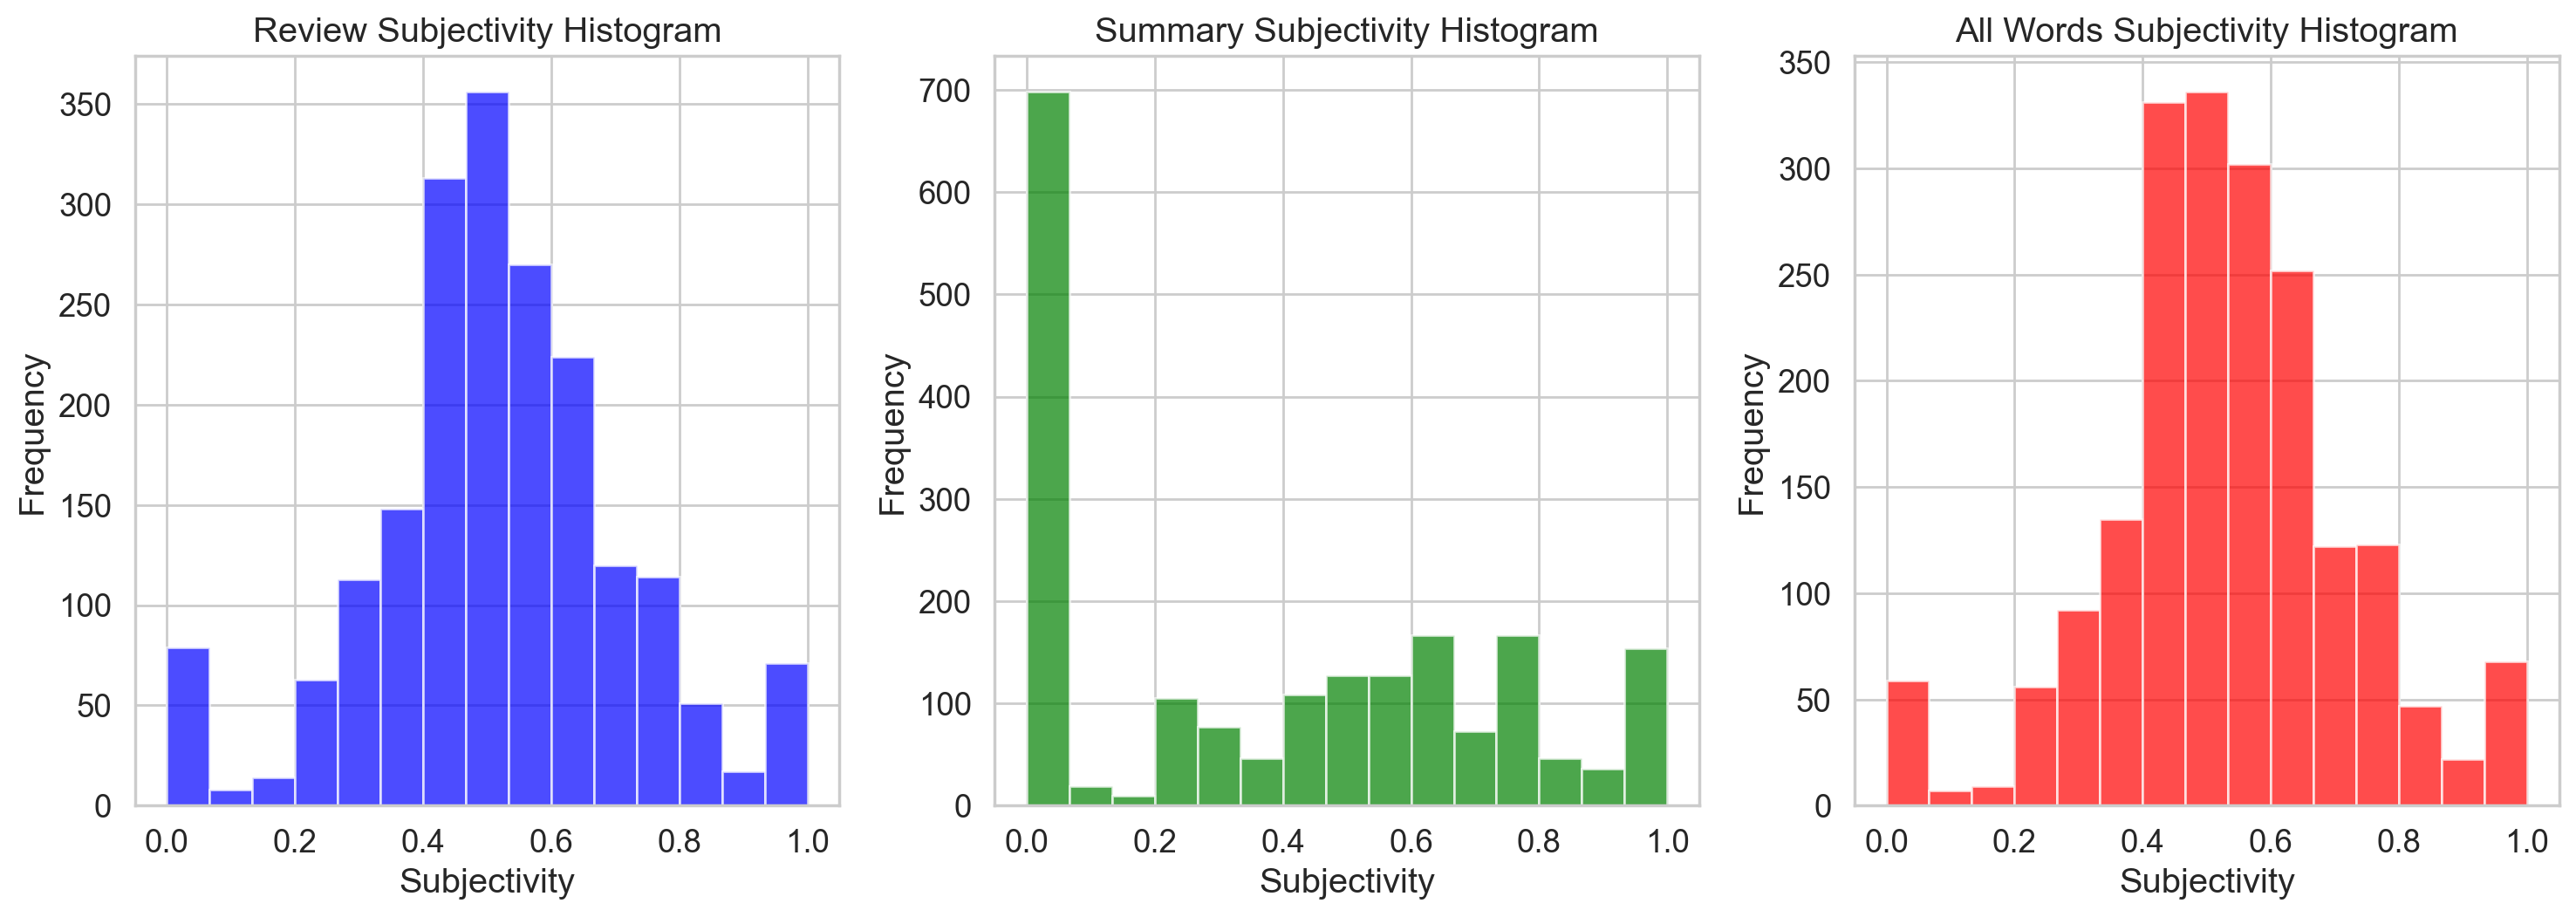

In [131]:
# Function to calculate sentiment subjectivity for a list of words
def extract_subjectivity(comment):
    return TextBlob(' '.join(comment)).sentiment.subjectivity

# Calculate subjectivity for 'review_tokens' column
df_copy['review_subjectivity'] = df_copy['review_tokens'].apply(extract_subjectivity)

# Calculate subjectivity for 'summary_tokens' column
df_copy['summary_subjectivity'] = df_copy['summary_tokens'].apply(extract_subjectivity)

# Calculate subjectivity for 'all_words' column
df_copy['all_words_subjectivity'] = df_copy['all_words'].apply(extract_subjectivity)

# Create histograms with 15 bins for subjectivity

# Create histograms with 15 bins for subjectivity
fig = plt.figure(figsize=(15, 10), dpi=200)

# Review Subjectivity
plt.subplot(234)
plt.hist(df_copy['review_subjectivity'], bins=15, color='blue', alpha=0.7)
plt.title('Review Subjectivity Histogram')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

# Summary Subjectivity
plt.subplot(235)
plt.hist(df_copy['summary_subjectivity'], bins=15, color='green', alpha=0.7)
plt.title('Summary Subjectivity Histogram')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

# All Words Subjectivity
plt.subplot(236)
plt.hist(df_copy['all_words_subjectivity'], bins=15, color='red', alpha=0.7)
plt.title('All Words Subjectivity Histogram')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Save the entire figure as a PNG file
# plt.savefig("subjectivity_histograms_figure.png", bbox_inches='tight')

### Information for personal reference

Polarity and sentiment subjectivity are two aspects of sentiment analysis used to assess and understand the sentiment expressed in text data.

Polarity:

- Polarity refers to the emotional tone or sentiment expressed in a piece of text.
- It typically ranges from -1 (indicating a negative sentiment) to 1 (indicating a positive sentiment), with 0 indicating a neutral sentiment.
- Polarity analysis aims to determine whether a text conveys a positive, negative, or neutral sentiment.
- For example, a positive review of a product might have a high positive polarity, while a negative review would have a high negative polarity.

Subjectivity:

- Subjectivity refers to the degree to which a statement or piece of text expresses a personal opinion, feeling, or judgment rather than objective information.
- It typically ranges from 0 to 1, with 0 indicating a completely objective statement and 1 indicating a highly subjective or opinionated statement.
- Subjectivity analysis helps determine how much of the text is based on the author's personal perspective or emotions.
- For example, a news article reporting facts may have low subjectivity (close to 0), while a personal blog post expressing strong opinions may have high subjectivity (close to 1).




## 6. Identify top 20 positive and negative reviews and summaries respectively

#### Top 20 negative reviews

In [132]:
# Top 20 negative reviews.
top_negative_reviews = df_copy.sort_values(by='review_polarity', ascending=True)['review'].head(20)

# View output.
print("\nTop 20 Negative Reviews:")
for idx, review in enumerate(top_negative_reviews, start=1):
    print(f"{idx}. {review}\n")


Top 20 Negative Reviews:
1. booo  unles you are patient know how to measure i didnt have the patience neither did my daughter  boring unless you are a craft person which i am not

2. keeps clients engaged while helping them develop anger management skills the only criticism is i wish more of the cards had questions

3. i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed

4. incomplete kit  very disappointing

5. i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through

6. im sorry i just find this product to be boring and to be frank juvenile

7. one of my staff will be using this game soon so i dont know how well it works as yet but after lo

In [133]:
# Display full contents of columns
pd.set_option('display.max_colwidth', None) 

top_negative_reviews = df_copy.sort_values(by='review_polarity', ascending=True).head(20)

# Reset the index to start at 0 and increment it by 1 to start at 1
top_negative_reviews = top_negative_reviews.reset_index(drop=True)
top_negative_reviews.index += 1

# Create a DataFrame with the 'review_polarity' column
top_negative_reviews_df = top_negative_reviews[['review', 'review_polarity']]

# Format the 'review_polarity' column to display values rounded to 3 decimal places
top_negative_reviews_df['review_polarity'] = top_negative_reviews_df['review_polarity'].apply(lambda x: round(x, 3))

# Display the entire DataFrame with a table format
print("\nTop 20 Negative Reviews:")
display(top_negative_reviews_df)


Top 20 Negative Reviews:


review  \
1                                                                                                                                                              booo  unles you are patient know how to measure i didnt have the patience neither did my daughter  boring unless you are a craft person which i am not   
2                                                                                                                                                                               keeps clients engaged while helping them develop anger management skills the only criticism is i wish more of the cards had questions   
3   i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed   
4                                                                                                                                                                                                                                                                                  incomplete kit  very disappointing   
5                                                                                                                                                             i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through   
6                                                                                                                                                                                                                                             im sorry i just find this product to be boring and to be frank juvenile   
7                                                                                     one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
8                                                                                                                                                                                                                                                    horrible\nnothing more to say\nwould give zero stars if possible   
9                                                                                                                                                                                                          i bought this as a christmas gift for my grandson  its a sticker book so how can i go wrong with this gift   
10                                                                                                                                                                                                                                                                                         expensive for what you get   
11                                                                                                                                                                                                                                                                             instructions are complicated to follow   
12                                                                                                                                                                                                                                                                                                          difficult   
13                                                                                                                                                                                                                                        

#### Top 20 negative summaries

## Top 20 negative summaries.
top_negative_summaries = df_copy.sort_values(by='summary_polarity', ascending=True)['summary'].head(20)

# View output.
print("\nTop 20 Negative Summaries:")
for idx, summary in enumerate(top_negative_summaries, start=1):
    print(f"{idx}. {summary}\n")

In [134]:
# Sort the DataFrame by 'summary_polarity' in ascending order to get the most negative summaries first
top_negative_summaries = df_copy.sort_values(by='summary_polarity', ascending=True).head(20)

# Reset the index to start at 0 and increment it by 1 to start at 1
top_negative_summaries = top_negative_summaries.reset_index(drop=True)
top_negative_summaries.index += 1

# Create a DataFrame with the 'summary' and 'summary_polarity' columns
top_negative_summaries_df = top_negative_summaries[['summary', 'summary_polarity']]

# Format the 'summary_polarity' column to display values rounded to 3 decimal places
top_negative_summaries_df['summary_polarity'] = top_negative_summaries_df['summary_polarity'].apply(lambda x: round(x, 3))


# Display the entire DataFrame with a table format
print("\nTop 20 Negative Summaries:")
display(top_negative_summaries_df)


Top 20 Negative Summaries:


summary  \
1                                              boring unless you are a craft person which i am    
2                                                                                        boring   
3                                           horrible nothing more to say would give zero stars    
4                                                                 the worst value ive ever seen   
5                   before this i hated running any rpg campaign dealing with towns because it    
6                                      another worthless dungeon masters screen from galeforce9   
7                                                                                  disappointed   
8                                                                                  disappointed   
9                                                                                  disappointed   
10                                                                                 disappointed   
11                                           promotes anger instead of teaching calming methods   
12                                                                 bad qualityall made of paper   
13                                                     too bad this is not what i was expecting   
14                                                                                   mad dragon   
15                                                                             small and boring   
16                                                                                disappointing   
17                                                                                disappointing   
18                                                                                disappointing   
19                                                                                disappointing   
20  the fact that 50 of this space is wasted on art and not terribly informative or needed art    

    summary_polarity  
1             -1.000  
2             -1.000  
3             -1.000  
4             -1.000  
5             -0.900  
6             -0.800  
7             -0.750  
8             -0.750  
9             -0.750  
10            -0.750  
11            -0.700  
12            -0.700  
13            -0.700  
14            -0.625  
15            -0.625  
16            -0.600  
17            -0.600  
18            -0.600  
19            -0.600  
20            -0.600

#### Top 20 positive reviews

In [135]:
# Top 20 positive reviews.
top_positive_reviews = df_copy.sort_values(by='review_polarity', ascending=False)['review'].head(20)

# View output.
print("Top 20 Positive Reviews:")
for idx, review in enumerate(top_positive_reviews, start=1):
    print(f"{idx}. {review}\n")

Top 20 Positive Reviews:
1. one of the best board games i played in along time

2. my daughter loves her stickers awesome seller thank you 

3. best set buy 2 if you have the means

4. awesome addition to my rpg gm system

5. awesome gift

6. delightful product

7. awesome toy

8. excellent activity for teaching selfmanagement skills

9. excellent toy to simulate thought

10. perfect just what i ordered

11. this was perfect to go with the 7 bean bags  i just wish they were not separate orders

12. perfect for tutoring my grandson in spelling

13. its awesome

14. wonderful for my grandson to learn the resurrection story

15. awesome set

16. came in perfect condition

17. awesome

18. it is the best thing to play with and also mind blowing in some ways

19. awesome book

20. wonderful product



In [136]:
# Sort the DataFrame by 'review_polarity' in descending order to get the most positive reviews first.
top_positive_reviews = df_copy.sort_values(by='review_polarity', ascending=False).head(20)

# Reset the index to start at 0 and increment it by 1 to start at 1
top_positive_reviews = top_positive_reviews.reset_index(drop=True)
top_positive_reviews.index += 1

# Create a DataFrame with the 'review_polarity' column
top_positive_reviews_df = top_positive_reviews[['review', 'review_polarity']]

# Format the 'review_polarity' column to display values rounded to 3 decimal places
top_positive_reviews_df['review_polarity'] = round(top_positive_reviews_df['review_polarity'], 3)

# Display the entire DataFrame with a table format
print("\nTop 20 Positive Reviews:")
display(top_positive_reviews_df)


Top 20 Positive Reviews:


review  \
1                                       one of the best board games i played in along time   
2                                 my daughter loves her stickers awesome seller thank you    
3                                                     best set buy 2 if you have the means   
4                                                     awesome addition to my rpg gm system   
5                                                                             awesome gift   
6                                                                       delightful product   
7                                                                              awesome toy   
8                                    excellent activity for teaching selfmanagement skills   
9                                                        excellent toy to simulate thought   
10                                                             perfect just what i ordered   
11  this was perfect to go with the 7 bean bags  i just wish they were not separate orders   
12                                            perfect for tutoring my grandson in spelling   
13                                                                             its awesome   
14                               wonderful for my grandson to learn the resurrection story   
15                                                                             awesome set   
16                                                               came in perfect condition   
17                                                                                 awesome   
18                    it is the best thing to play with and also mind blowing in some ways   
19                                                                            awesome book   
20                                                                       wonderful product   

    review_polarity  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
5               1.0  
6               1.0  
7               1.0  
8               1.0  
9               1.0  
10              1.0  
11              1.0  
12              1.0  
13              1.0  
14              1.0  
15              1.0  
16              1.0  
17              1.0  
18              1.0  
19              1.0  
20              1.0

#### Top 20 positive summaries

In [137]:
# Top 20 positive summaries.
top_positive_summaries = df_copy.sort_values(by='summary_polarity', ascending=False)['summary'].head(20)


# View output.
print("\nTop 20 Positive Summaries:")
for idx, summary in enumerate(top_positive_summaries, start=1):
    print(f"{idx}. {summary}\n")


Top 20 Positive Summaries:
1. just awesome

2. adds a six player option and an excellent expansion

3. the pigeon is the perfect addition to a school library

4. best boardgame ever

5. perfect for preschoolers

6. excellent puzzle

7. perfect

8. best dungeon crawler

9. wonderful ball to manipulate

10. awesome expansion

11. awesome

12. theyre the perfect size to keep in the car or a diaper 

13. best one in the series

14. excellent

15. perfect gift

16. wonderful and

17. one of the best games ever

18. the best among the dd boardgames

19. awesome seller thank you

20. one of the best games ever



In [138]:
# Sort the DataFrame by 'summary_polarity' in descending order to get the most positive summaries first.
top_positive_summaries = df_copy.sort_values(by='summary_polarity', ascending=False).head(20)

# Reset the index to start at 0 and increment it by 1 to start at 1
top_positive_summaries = top_positive_summaries.reset_index(drop=True)
top_positive_summaries.index += 1

# Create a DataFrame with the 'summary' and 'summary_polarity' columns
top_positive_summaries_df = top_positive_summaries[['summary', 'summary_polarity']]

# Format the 'summary_polarity' column to display values rounded to 3 decimal places
top_positive_summaries_df['summary_polarity'] = round(top_positive_summaries_df['summary_polarity'], 3)


# Display the entire DataFrame with a table format
print("\nTop 20 Positive Summaries:")
display(top_positive_summaries_df)


Top 20 Positive Summaries:


summary  summary_polarity
1                                              just awesome               1.0
2       adds a six player option and an excellent expansion               1.0
3    the pigeon is the perfect addition to a school library               1.0
4                                       best boardgame ever               1.0
5                                  perfect for preschoolers               1.0
6                                          excellent puzzle               1.0
7                                                   perfect               1.0
8                                      best dungeon crawler               1.0
9                              wonderful ball to manipulate               1.0
10                                        awesome expansion               1.0
11                                                  awesome               1.0
12  theyre the perfect size to keep in the car or a diaper                1.0
13                                   best one in the series               1.0
14                                                excellent               1.0
15                                             perfect gift               1.0
16                                            wonderful and               1.0
17                               one of the best games ever               1.0
18                         the best among the dd boardgames               1.0
19                                 awesome seller thank you               1.0
20                               one of the best games ever               1.0

The polarity for sentiment analysis indicates the distribution of sentiment scores within a dataset. The mean of 0.21 for review polarity and 0.22 for summary polarity indicates that on average the sentiment score lean towards the positive side. The SD of 0.27 and 0.34 respectively, shows the degree of variability in the sentiments scores, suggesting only slight variations in the dataset, greater in summary column. Regarding the quartiles, 25th percentile has values close to 0, indicating neutral sentiment in the dataset. While the 50th (0.18 & 0.1), and 75th percentile (0.358 and 0.5) imply there are more positive sentiments scores than negative, predominantly positive sentiment.

Subjectivity measures the extent to which text expresses personal opinions or feelings. The mean was 0.51 and 0.38 for review and summary, indicating more personal subjective tones in the reviews which is to be expected. From the figures below, the majority of summaries fall under 0 polarity and 0 subjectivity, indicating neutral.

When looking at the top positive and negative reviews and summaries we can see what customers are enjoying/ being frustrated with. Some recurring negative points were that the games were “hard for children to understand, confusing and difficult instructions” as well as missing parts or books bound upside down. 

# 